# Exploratory Analysis of RAPTOR Metrics in the Modern NBA (1977-2023)

------
Presented by: Christopher Baker, Jonathan Carmichael, Jack Hayes, Wipawadee Naiyakhun, and Uzma Sayyeda


**Importing data and merging datasets**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import scipy.stats as st 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image
%matplotlib inline

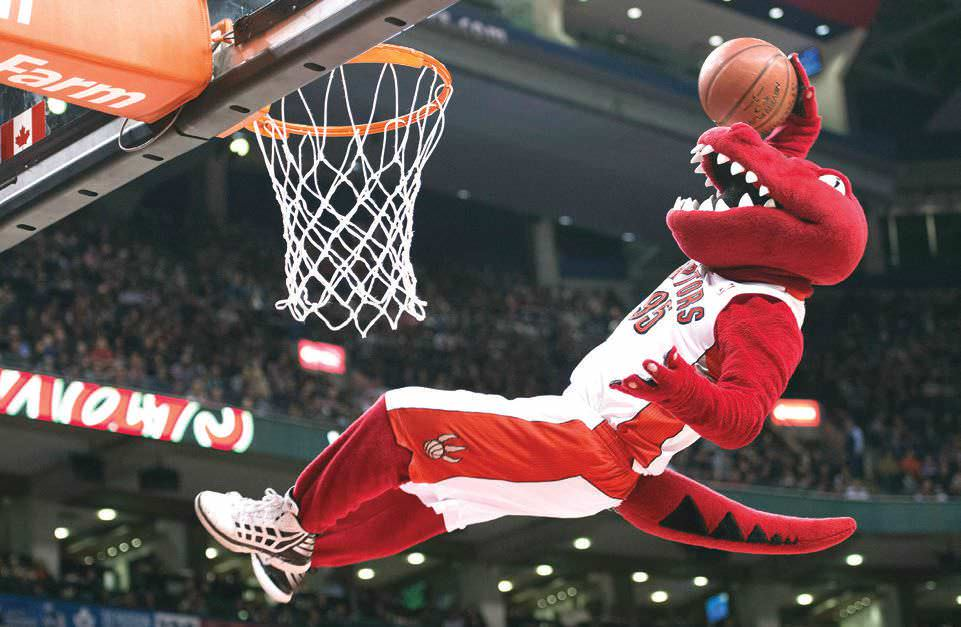

In [88]:
# Import our datasets
latest_df = pd.read_csv("CSVs/latest_RAPTOR_by_team.csv")
historical_df = pd.read_csv("CSVs/historical_RAPTOR_by_team.csv")

# Combine the data into a single dataset.
merged_df = pd.merge(historical_df, latest_df, how="outer")
merged_df.head()

player_name  player_id  season season_type team  poss    mp  \
0  Kareem Abdul-Jabbar  abdulka01    1977          PO  LAL  1020   467   
1  Kareem Abdul-Jabbar  abdulka01    1977          RS  LAL  6654  3016   
2      Zaid Abdul-Aziz  abdulza01    1977          RS  BUF   441   195   
3        Tom Abernethy  abernto01    1977          PO  LAL   467   214   
4        Tom Abernethy  abernto01    1977          RS  LAL  3040  1378   

   raptor_offense  raptor_defense  raptor_total  ...  predator_offense  \
0        6.350694        3.288313      9.639006  ...          6.592019   
1        4.267101        3.075579      7.342679  ...          4.482404   
2       -1.926415       -0.368835     -2.295249  ...         -1.817927   
3        0.024715       -0.825643     -0.800928  ...         -0.565843   
4        0.517829       -0.459991      0.057838  ...          0.141415   

   predator_defense  predator_total  pace_impact  raptor_box_offense  \
0          3.065131        9.657150    -0.432080                 NaN   
1          2.556956        7.039361    -0.513828                 NaN   
2         -1.624327       -3.442253    -0.751147                 NaN   
3         -1.695077       -2.260920    -0.425337                 NaN   
4         -0.835555       -0.694139    -0.315821                 NaN   

   raptor_box_defense  raptor_box_total  raptor_onoff_offense  \
0                 NaN               NaN                   NaN   
1                 NaN               NaN                   NaN   
2                 NaN               NaN                   NaN   
3                 NaN               NaN                   NaN   
4                 NaN               NaN                   NaN   

   raptor_onoff_defense  raptor_onoff_total  
0                   NaN                 NaN  
1                   NaN                 NaN  
2                   NaN                 NaN  
3                   NaN                 NaN  
4                   NaN                 NaN  

[5 rows x 23 columns]

**Cleaning Merged Dataframe**

In [89]:
# removing null data
# raptor_box and raptor_onoff are only for 2013-onward

merged_df.fillna(0, inplace=True)
clean_df = merged_df
clean_df.isnull().sum()


player_name             0
player_id               0
season                  0
season_type             0
team                    0
poss                    0
mp                      0
raptor_offense          0
raptor_defense          0
raptor_total            0
war_total               0
war_reg_season          0
war_playoffs            0
predator_offense        0
predator_defense        0
predator_total          0
pace_impact             0
raptor_box_offense      0
raptor_box_defense      0
raptor_box_total        0
raptor_onoff_offense    0
raptor_onoff_defense    0
raptor_onoff_total      0
dtype: int64

In [90]:
clean_df.head()

player_name  player_id  season season_type team  poss    mp  \
0  Kareem Abdul-Jabbar  abdulka01    1977          PO  LAL  1020   467   
1  Kareem Abdul-Jabbar  abdulka01    1977          RS  LAL  6654  3016   
2      Zaid Abdul-Aziz  abdulza01    1977          RS  BUF   441   195   
3        Tom Abernethy  abernto01    1977          PO  LAL   467   214   
4        Tom Abernethy  abernto01    1977          RS  LAL  3040  1378   

   raptor_offense  raptor_defense  raptor_total  ...  predator_offense  \
0        6.350694        3.288313      9.639006  ...          6.592019   
1        4.267101        3.075579      7.342679  ...          4.482404   
2       -1.926415       -0.368835     -2.295249  ...         -1.817927   
3        0.024715       -0.825643     -0.800928  ...         -0.565843   
4        0.517829       -0.459991      0.057838  ...          0.141415   

   predator_defense  predator_total  pace_impact  raptor_box_offense  \
0          3.065131        9.657150    -0.432080                 0.0   
1          2.556956        7.039361    -0.513828                 0.0   
2         -1.624327       -3.442253    -0.751147                 0.0   
3         -1.695077       -2.260920    -0.425337                 0.0   
4         -0.835555       -0.694139    -0.315821                 0.0   

   raptor_box_defense  raptor_box_total  raptor_onoff_offense  \
0                 0.0               0.0                   0.0   
1                 0.0               0.0                   0.0   
2                 0.0               0.0                   0.0   
3                 0.0               0.0                   0.0   
4                 0.0               0.0                   0.0   

   raptor_onoff_defense  raptor_onoff_total  
0                   0.0                 0.0  
1                   0.0                 0.0  
2                   0.0                 0.0  
3                   0.0                 0.0  
4                   0.0                 0.0  

[5 rows x 23 columns]

**Defining Functions**

In [91]:
## bar plot

def bar_plot(x_axis, y_axis, xlabel, ylabel, title, size, color):
    fig, ax = plt.subplots(figsize=(size))
    bar_container= ax.bar(x_axis, y_axis, alpha=0.5, color=color)
    ax.bar_label(bar_container, fmt='%.5s')
    plt.xlabel(xlabel, weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"Top 20 {title}", weight="bold")
    plt.xticks(rotation=45)

    plt.show()

In [92]:
## linear regression

def regression_plot(x_axis, y_axis, xlabel, ylabel, text_coordinates, x=0, y=0):
    

    (slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq =  "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_axis, y_axis, marker=r'8', c="#F94C10", s=50, alpha=0.7, edgecolor="#F94C10")
    plt.plot(x_axis, regress_values, "r:", alpha=0.5)
    plt.xlabel(xlabel, weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"{xlabel} vs {ylabel} by Teams", color="#F94C10", weight="bold")
    plt.grid(True, color="b", alpha=0.10)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="#F94C10")
    plt.annotate(line_eq, xy=(x, y), xycoords='axes fraction', fontsize=10, color="red")
    print(f"The r-value is: {rvalue**2}")
    for team, txt in enumerate(team_names):
        plt.annotate(txt, (x_axis[team], y_axis[team]), color="#F94C10",alpha=0.5)
        
    plt.show()

In [93]:
## Seaborn bar plot function

def sns_bar_plot(data,x,y,title,xlabel,ylabel):
    
    f, (ax) = plt.subplots(figsize=(15,7))
    sns.set_theme(style="white", context="notebook",font_scale=0.9)

    sns.barplot(x=x,
                y=y,
                data=data,
                palette="autumn",
                alpha=0.7)

    for i in ax.containers:
        ax.bar_label(i,fmt="%.5s")
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, weight="bold")
    ax.axhline(0, color="k", clip_on=False)
    sns.despine(bottom=True)
    plt.show()

In [94]:
## make plotly scatter plot function

def int_scatter(data,x,y,color,title,xlabel,ylabel):
    fig = px.scatter(data,
                 x=x,
                 y=y,
                 color=color,
                 color_continuous_scale=px.colors.sequential.YlOrRd,
                 template="ggplot2",
                 title=title,
                 trendline="ols",
                 trendline_scope="overall",
                 trendline_color_override="#F94C10",
                 labels={"x": "Total RAPTOR Scores","y": ylabel},
                 hover_data=['player_name'])
    fig.update_layout(xaxis_title=xlabel,
                      yaxis_title=ylabel,
                      legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="left",
                      x=0.01))
                    
    fig.show()

In [95]:
## bar_polar function

def polar_bar(data,color,title):

    fig=px.bar_polar(data,
                 r="raptor_total",
                 theta="player_name",
                 color=color,
                 color_continuous_scale=px.colors.sequential.YlOrRd,
                 template="ggplot2",
                 title=title)
    fig.show()

In [96]:
# function for Jack's visuals

def polar_scatter(rvalue, title):
    fig=px.scatter_polar(raptor_predator_df, r=rvalue, theta="team", color="team", title=title, template="ggplot2")
    fig.show()

In [97]:
def trace_var(y,name):
    trace=go.Box(y = y,name=name,boxpoints="all")
    return trace

In [98]:
def box_var(player_name):
    box=clean_df.raptor_total[clean_df["player_name"]==player_name]
    return box

### Summary Statistics by Team

In [99]:
agg_sum=clean_df.groupby("team")[["poss", "pace_impact",
                           "mp","raptor_total",
                           "raptor_offense",
                           "raptor_defense",
                           "raptor_onoff_total",
                           "predator_total",
                           "war_total"]].agg("mean").reset_index()
agg_sum.head()

team         poss  pace_impact           mp  raptor_total  raptor_offense  \
0  ATL  1642.004219     0.263341   819.489451     -1.570031       -1.187607   
1  BOS  1704.759411     0.248033   838.174304     -1.199087       -1.130326   
2  BRK  1366.402941     0.275703   666.041176     -1.191441       -1.077620   
3  BUF  2382.189189     0.180248  1068.513514     -2.715885       -1.835151   
4  CHA  1938.507895     0.133151   975.000000     -2.366248       -1.909040   

   raptor_defense  raptor_onoff_total  predator_total  war_total  
0       -0.382423            0.018678       -1.956244   1.140147  
1       -0.068761            0.033699       -1.613733   1.448069  
2       -0.113821           -0.316375       -1.734914   0.843397  
3       -0.880735            0.000000       -2.881760   0.983682  
4       -0.457208           -0.145483       -2.844577   0.952573

In [100]:
x0=agg_sum["raptor_total"]
x1=agg_sum["war_total"]
x3=agg_sum["predator_total"]
y=agg_sum["team"]
fig = go.Figure()
fig.add_trace(go.Histogram(x=x0,y=y,name='Raptor Total',marker_color='salmon'))
fig.add_trace(go.Histogram(x=x1,y=y,name='War Total',marker_color='orange'))
fig.add_trace(go.Histogram(x=x3,y=y,name='Predator Total',marker_color='gold'))

# Overlay both histograms
fig.update_layout(barmode='stack',title_text='Histogram of Average Raptor Total, War Total and Predator Total',
                  xaxis_title_text='Scores',
                  yaxis_title_text='Number of Teams',
                 template="ggplot2"
 
                 )
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [101]:
#defining mean dataframe by player
# ref-tutor
mean_df = clean_df.groupby("player_name").mean(numeric_only = True).reset_index()
mean_df.head()

player_name       season         poss           mp  raptor_offense  \
0     A.C. Green  1993.166667  2714.833333  1355.700000       -0.358516   
1  A.J. Bramlett  2000.000000   123.000000    61.000000       -8.360250   
2   A.J. English  1991.500000  3196.500000  1554.000000       -1.835582   
3    A.J. Guyton  2002.000000   787.333333   415.333333       -4.140556   
4    A.J. Lawson  2023.000000   119.500000    54.000000       -5.160708   

   raptor_defense  raptor_total  war_total  war_reg_season  war_playoffs  \
0        0.181476     -0.177040   2.005301        1.790797      0.214503   
1       -1.460235     -9.820485  -0.221281       -0.221281      0.000000   
2       -2.554083     -4.389665  -1.298910       -1.298910      0.000000   
3       -1.434026     -5.574582  -0.077551       -0.077551      0.000000   
4       -9.392145    -14.552853  -0.111057       -0.111057      0.000000   

   predator_offense  predator_defense  predator_total  pace_impact  \
0         -0.444949         -0.005895       -0.450844    -0.487704   
1         -7.899853         -1.093612       -8.993465     0.527413   
2         -2.246574         -2.712289       -4.958862     0.001642   
3         -3.658171         -2.666460       -6.324631    -0.080961   
4         -4.387150         -8.968243      -13.355393     2.066382   

   raptor_box_offense  raptor_box_defense  raptor_box_total  \
0            0.000000            0.000000          0.000000   
1            0.000000            0.000000          0.000000   
2            0.000000            0.000000          0.000000   
3            0.000000            0.000000          0.000000   
4            0.007521           -9.038925         -9.031403   

   raptor_onoff_offense  raptor_onoff_defense  raptor_onoff_total  
0              0.000000              0.000000            0.000000  
1              0.000000              0.000000            0.000000  
2              0.000000              0.000000            0.000000  
3              0.000000              0.000000            0.000000  
4            -24.623719             -8.015667          -32.639386

### Question 1: Do the average amount of possessions per player (across all seasons) greatly impact that player’s total RAPTOR ratings? Why or why not?

In [102]:
# defining a full list of players from both sets of data based on TOTAL possessions and TOTAL raptor totals

poss_raptor_sum = clean_df.groupby(["player_name"])[["poss", "raptor_total"]].sum(numeric_only = None).reset_index()
poss_raptor_sum.head()

player_name   poss  raptor_total
0     A.C. Green  81445     -5.311204
1  A.J. Bramlett    123     -9.820485
2   A.J. English   6393     -8.779331
3    A.J. Guyton   2362    -16.723745
4    A.J. Lawson    239    -29.105705

In [103]:
# defining a full list of players from both sets of data based on AVERAGE possessions and AVERAGE raptor totals

poss_raptor_avg = mean_df.sort_values(by="poss", ascending= False)
poss_raptor_avg.reset_index()
poss_raptor_avg.head(3)

player_name  season    poss      mp  raptor_offense  \
1192      Franz Wagner  2022.5  5282.0  2519.0        0.646062   
1453  Jabari Smith Jr.  2023.0  5124.0  2451.0       -3.261084   
2707    Paolo Banchero  2023.0  5096.0  2430.0       -1.397951   

      raptor_defense  raptor_total  war_total  war_reg_season  war_playoffs  \
1192        1.343920      1.989981   6.135308        6.135308           0.0   
1453       -1.462099     -4.723183  -2.460988       -2.460988           0.0   
2707       -1.690713     -3.088664  -0.421516       -0.421516           0.0   

      predator_offense  predator_defense  predator_total  pace_impact  \
1192         -0.487098          1.126964        0.639866     0.155131   
1453         -2.764936         -1.793383       -4.558320    -0.265003   
2707         -1.596660         -1.852706       -3.449365     0.395364   

      raptor_box_offense  raptor_box_defense  raptor_box_total  \
1192            0.341273            0.359909          0.701182   
1453           -3.143492           -0.846204         -3.989696   
2707           -1.577063           -0.880123         -2.457186   

      raptor_onoff_offense  raptor_onoff_defense  raptor_onoff_total  
1192              0.453715              2.937217            3.390932  
1453             -2.987966             -3.860819           -6.848785  
2707             -0.515354             -4.506574           -5.021928

In [104]:
# Sorting top 20 players based on total possessions and raptor totals

poss_sum = poss_raptor_sum.sort_values(by="poss", ascending=False)
poss_sum_top = poss_sum.head(20)

raptor = poss_raptor_sum.sort_values(by="raptor_total", ascending=False)
raptor_sum_top = raptor.head(20)

In [105]:
# Sorting top 20 players based on AVG possessions and raptor totals

poss_avg_top = poss_raptor_avg.head(20)

raptor = poss_raptor_avg.sort_values(by="raptor_total", ascending=False)
raptor_avg_top = raptor.head(20)

**Top 20 Players by Possessions (Total and Average)**

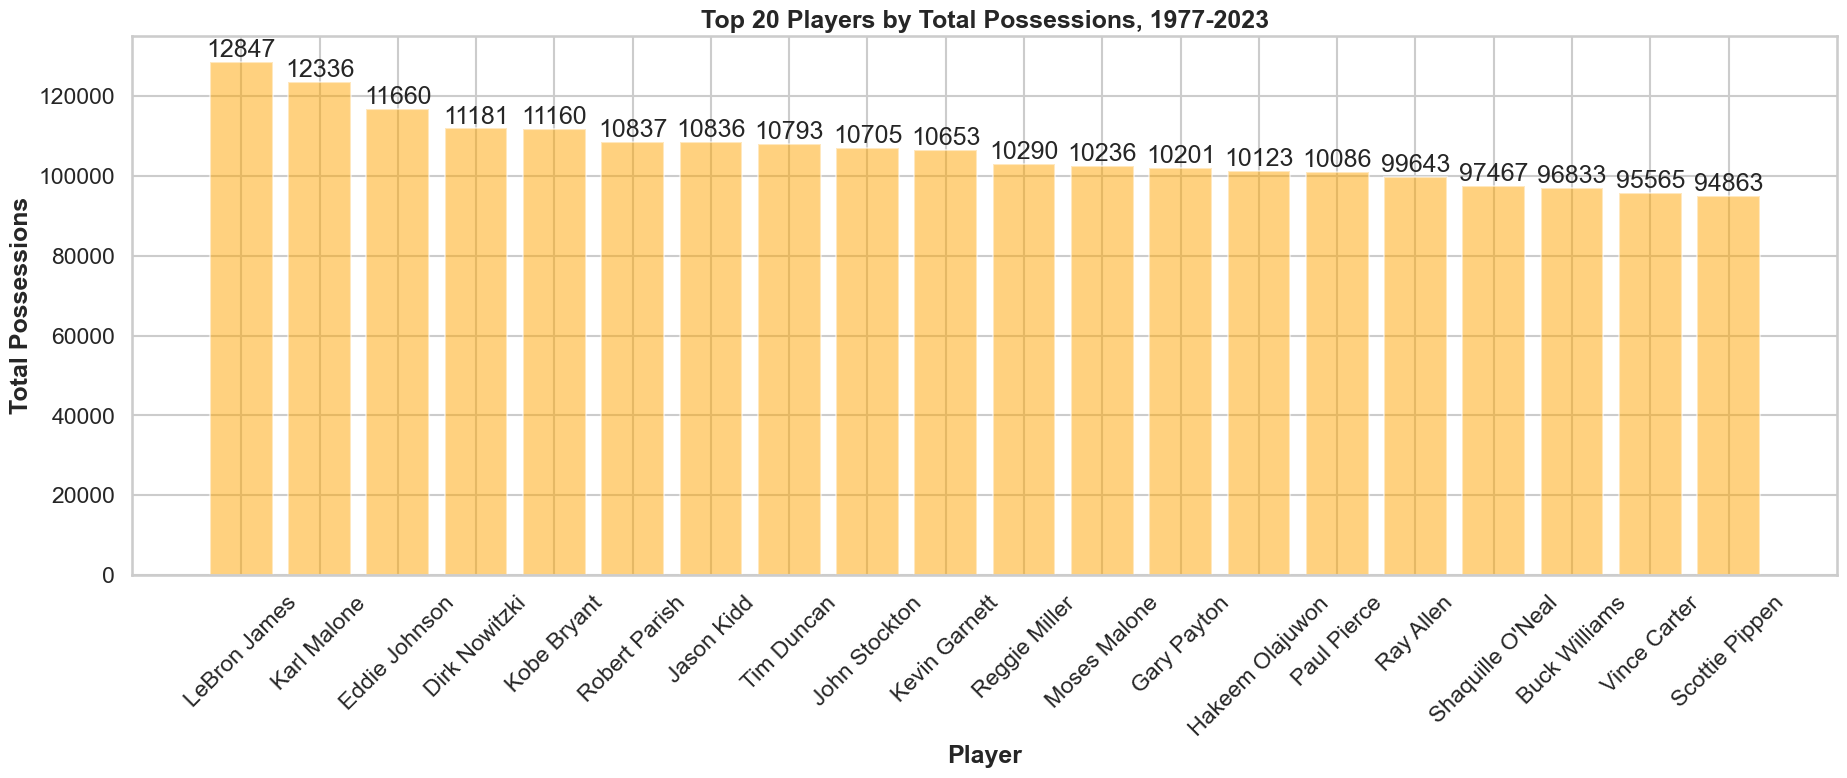

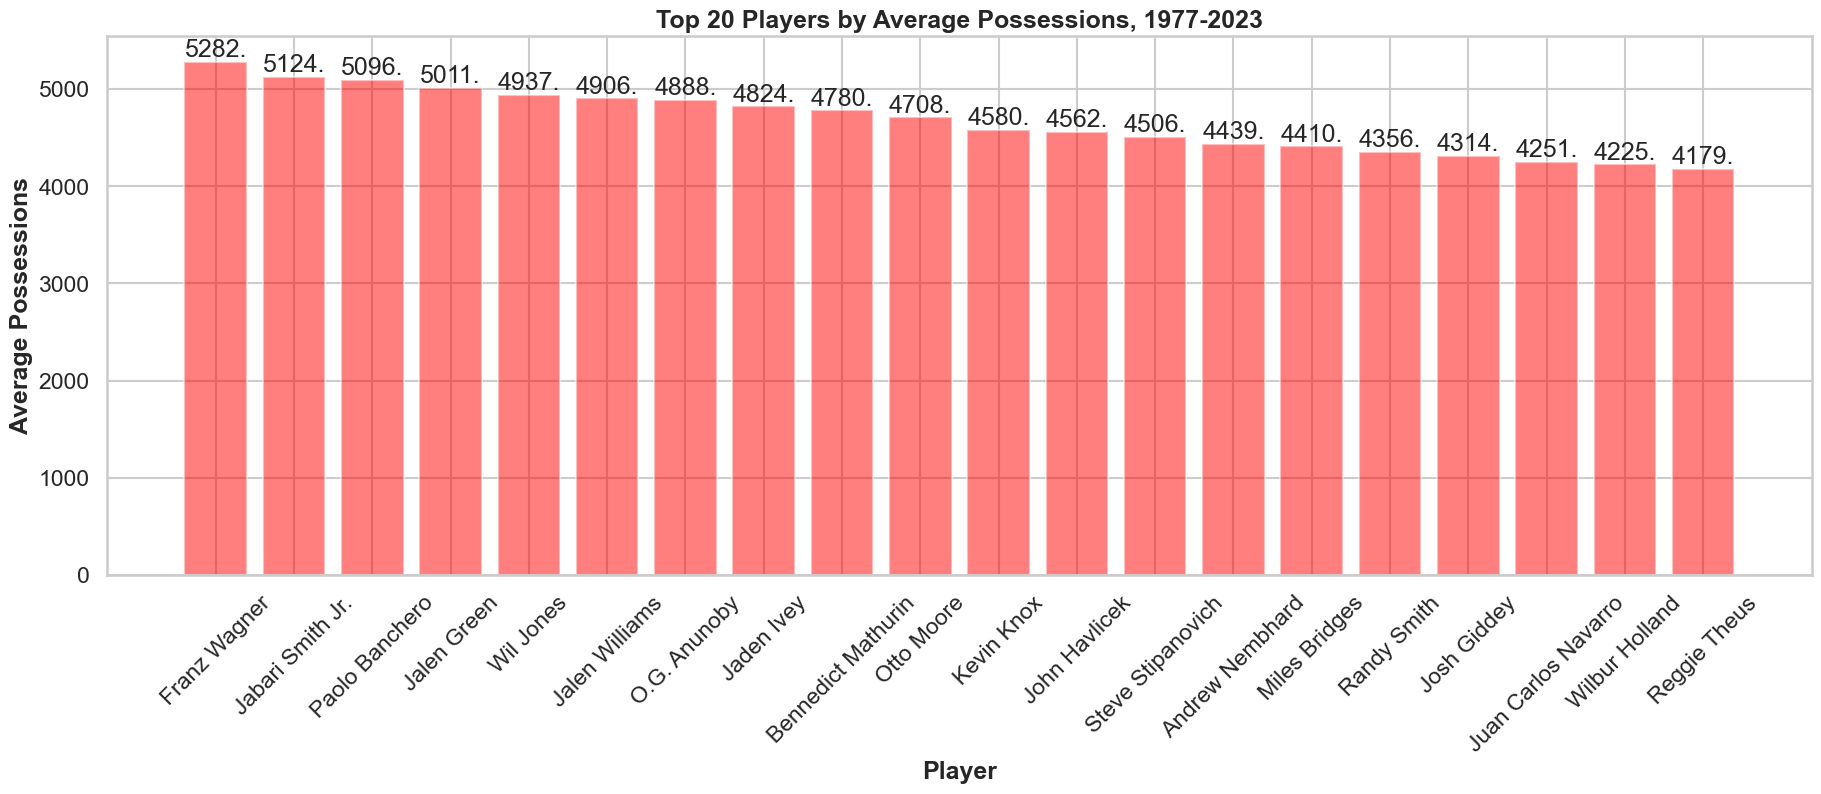

In [106]:
# Slice/sort first graph

top_20_poss_sum = poss_sum_top.sort_values(by="poss", ascending=False).head(20)

# Set up variables
poss = top_20_poss_sum["poss"]
player_names = top_20_poss_sum["player_name"]
color = "orange"

# Generate total bar plot
bar_plot(player_names, poss, "Player", "Total Possessions", "Players by Total Possessions, 1977-2023", (22,7), color)

print("")
print("")

# Slice/sort second graph

top_20_poss_avg = poss_avg_top.sort_values(by="poss", ascending=False).head(20)

# Set up variables
poss = top_20_poss_avg["poss"]
player_names = top_20_poss_avg["player_name"]
color = "red"

# Generate average bor plot
bar_plot(player_names, poss, "Player", "Average Possessions", "Players by Average Possessions, 1977-2023", (22,7), color)

**Top 20 Players by RAPTOR Total (Total and Average)**

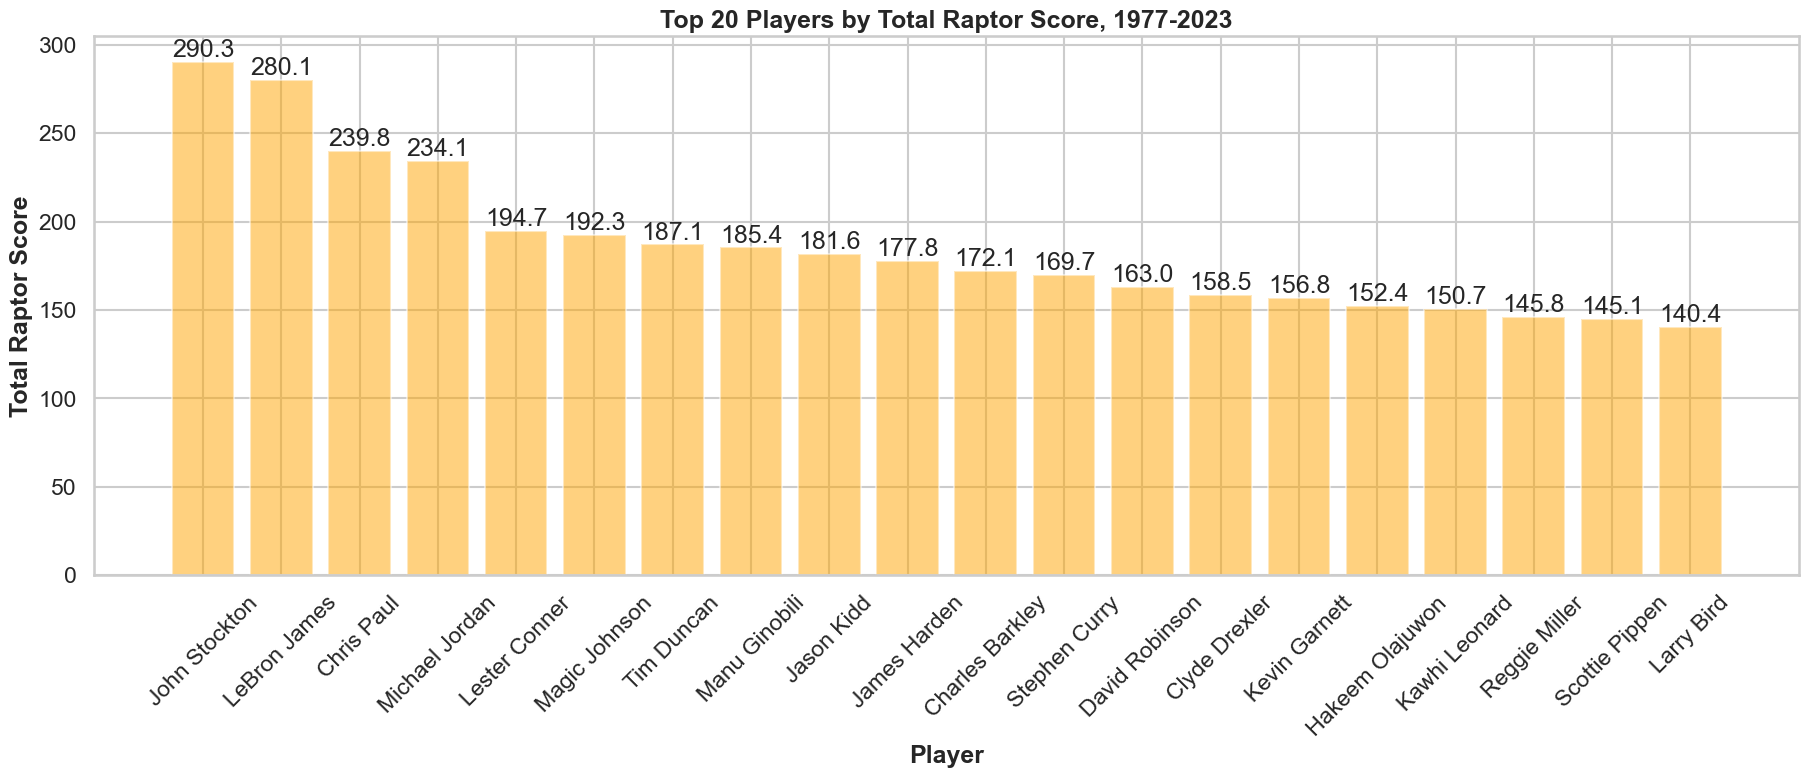

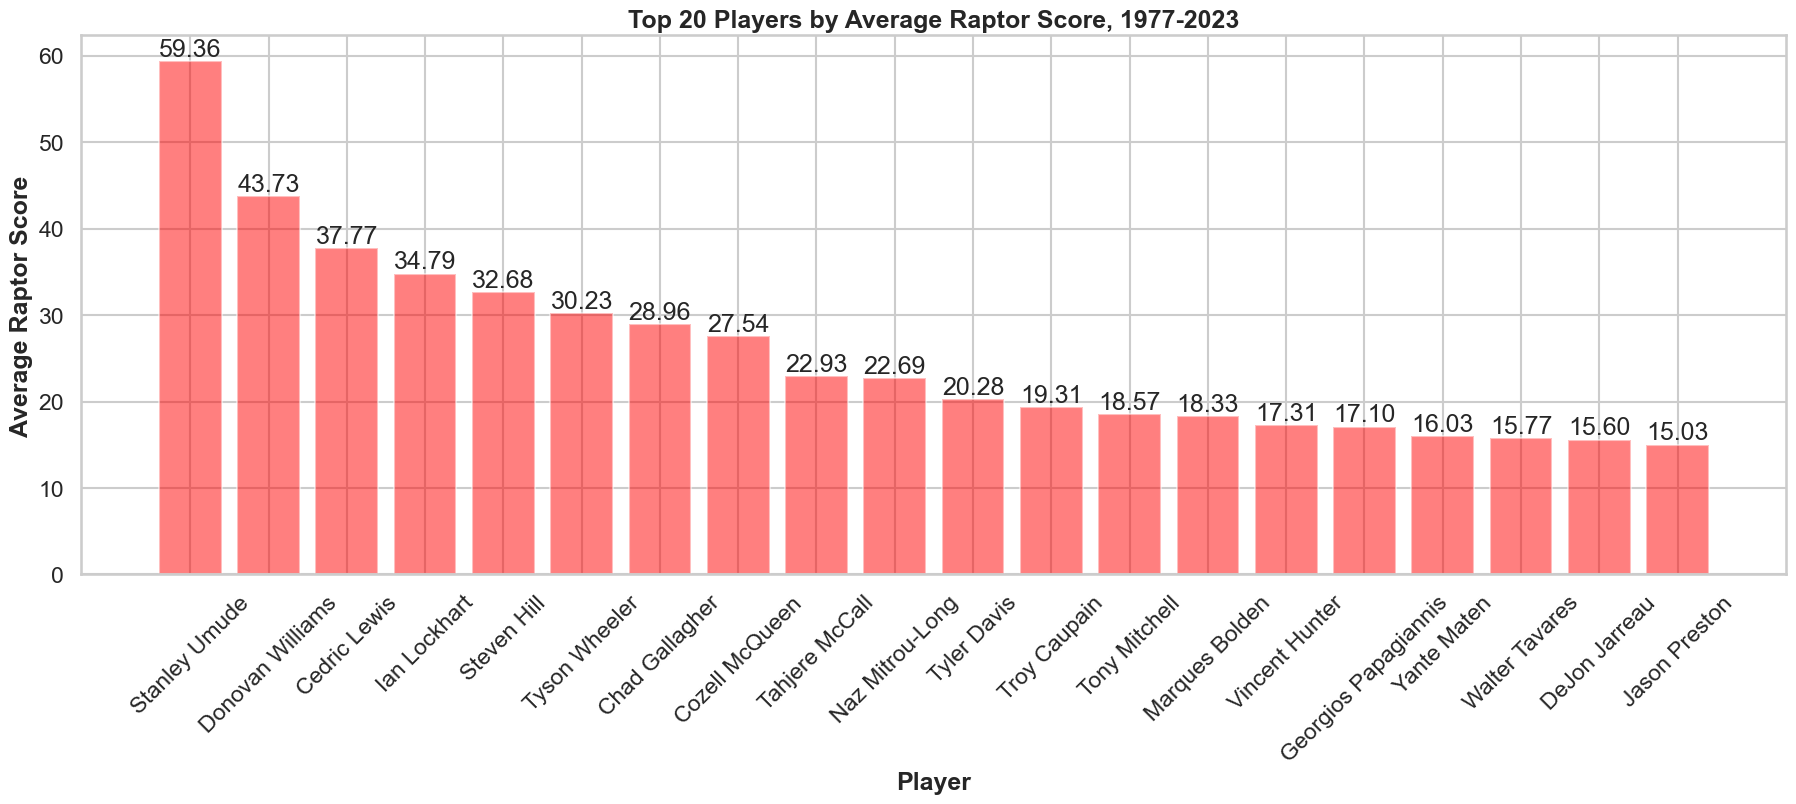

In [107]:
# Slice/sort first graph

top_20_raptor_sum = raptor_sum_top.sort_values(by="raptor_total", ascending=False).head(20)

# Set up variables
poss = top_20_raptor_sum["raptor_total"]
player_names = top_20_raptor_sum["player_name"]
color = "orange"

# Generate total bar plot
bar_plot(player_names, poss, "Player", "Total Raptor Score", "Players by Total Raptor Score, 1977-2023", (22,7), color)

print("")
print("")

# Slice/sort second graph

top_20_raptor_avg = raptor_avg_top.sort_values(by="raptor_total", ascending=False).head(20)

# Set up variables
poss = top_20_raptor_avg["raptor_total"]
player_names = top_20_raptor_avg["player_name"]
color = "red"

# Generate average bar blot
bar_plot(player_names, poss, "Player", "Average Raptor Score", "Players by Average Raptor Score, 1977-2023", (22,7), color)

**Linear Regression for Total Raptor Score vs. Total Possessions**

In [108]:
# make a new dataframe to display by teams

total_players = clean_df.groupby("team")["player_name"].count()
raptor_total = clean_df.groupby("team")["raptor_total"].mean()
poss_total = clean_df.groupby("team")["poss"].mean()

team_poss_raptor = pd.DataFrame({"Total Players":total_players,
                                 "Total RAPTOR Score":raptor_total,
                                 "Total Possessions":poss_total})

team_poss_raptor_lin = team_poss_raptor.reset_index()
team_poss_raptor_lin.head()

team  Total Players  Total RAPTOR Score  Total Possessions
0  ATL           1185           -1.570031        1642.004219
1  BOS           1222           -1.199087        1704.759411
2  BRK            340           -1.191441        1366.402941
3  BUF             37           -2.715885        2382.189189
4  CHA            380           -2.366248        1938.507895

In [109]:
# linear regression for total RAPTOR score vs. total possessions

x_axis = team_poss_raptor_lin["Total RAPTOR Score"]
y_axis = team_poss_raptor_lin["Total Possessions"]
team_names = team_poss_raptor_lin["team"]
# plt.savefig("./avg_poss_teams.png")

regression_plot(x_axis, y_axis, "Average RAPTOR Score", "Average Possessions", (-4,0.4), 0.1, 0.1)

The r-value is: 0.19019525425278175


## Question #2: Which team displayed the highest/lowest RAPTOR ratings across the 2022-23 season across all players? How does this data compare to their predictive PREDATOR model?

In [110]:
regular_season_raptor = latest_df[latest_df["season_type"] == "RS"]

In [111]:
# Total Scores by Teams

raptor_team = regular_season_raptor.groupby("team")["raptor_total"].mean()
predator_team = regular_season_raptor.groupby("team")["predator_total"].mean()
raptor_offense_team = regular_season_raptor.groupby("team")["raptor_offense"].mean()
raptor_defense_team = regular_season_raptor.groupby("team")["raptor_defense"].mean()
predator_offense_team = regular_season_raptor.groupby("team")["predator_offense"].mean() 
predator_defense_team = regular_season_raptor.groupby("team")["predator_defense"].mean()

In [112]:
# Combine into dataframe

raptor_predator = pd.DataFrame({"Raptor Total":raptor_team,
                                   "Predator Total":predator_team,
                                   "Raptor Offense":raptor_offense_team,
                                   "Raptor Defense":raptor_defense_team,
                                   "Predator Offense":predator_offense_team,
                                   "Predator Defense":predator_defense_team})

raptor_predator_df = raptor_predator.reset_index()
raptor_predator_df.head()

team  Raptor Total  Predator Total  Raptor Offense  Raptor Defense  \
0  ATL      0.672875       -0.354877        0.493756        0.179119   
1  BOS     -0.554685       -0.298610       -0.388098       -0.166587   
2  BRK     -2.599690       -1.938229       -2.946680        0.346991   
3  CHA     -2.121315       -2.552996       -1.917041       -0.204274   
4  CHI     -0.222302       -1.296009       -0.773662        0.551360   

   Predator Offense  Predator Defense  
0          0.463788         -0.818665  
1         -0.039876         -0.258733  
2         -2.338284          0.400056  
3         -2.036420         -0.516577  
4         -1.321329          0.025320

In [113]:
#raptor_team.sort_values(ascending=False, inplace=True)
#top_20_rteams=raptor_team.head(20)
#top_20_rteams

raptor_predator_df.sort_values(by="Raptor Total", ascending=False, inplace=True)
top_10_rteams=raptor_predator_df.head(10)
top_10_rteams.head()

team  Raptor Total  Predator Total  Raptor Offense  Raptor Defense  \
0   ATL      0.672875       -0.354877        0.493756        0.179119   
8   DET      0.368597        0.087427       -0.859854        1.228451   
5   CLE      0.289206        1.238446       -0.631976        0.921182   
23  PHO      0.199152        0.434871       -0.242433        0.441585   
27  TOR     -0.013382       -0.021695       -0.423977        0.410595   

    Predator Offense  Predator Defense  
0           0.463788         -0.818665  
8          -0.607580          0.695007  
5           0.174036          1.064410  
23          0.059398          0.375473  
27         -0.433731          0.412036

In [114]:
#predator_team.sort_values(ascending=False, inplace=True)
#top_20_pteams=predator_team.head(20)
#top_20_pteams

raptor_predator_df.sort_values(by="Predator Total", ascending=False, inplace=True)
top_10_pteams=raptor_predator_df.head(10)
top_10_pteams.head()

team  Raptor Total  Predator Total  Raptor Offense  Raptor Defense  \
5   CLE      0.289206        1.238446       -0.631976        0.921182   
23  PHO      0.199152        0.434871       -0.242433        0.441585   
8   DET      0.368597        0.087427       -0.859854        1.228451   
27  TOR     -0.013382       -0.021695       -0.423977        0.410595   
1   BOS     -0.554685       -0.298610       -0.388098       -0.166587   

    Predator Offense  Predator Defense  
5           0.174036          1.064410  
23          0.059398          0.375473  
8          -0.607580          0.695007  
27         -0.433731          0.412036  
1          -0.039876         -0.258733

In [115]:
raptor_predator_df.sort_values(by="Raptor Total", ascending=True, inplace=True)
bottom_10_rteams=raptor_predator_df.head(10)
bottom_10_rteams.head()

team  Raptor Total  Predator Total  Raptor Offense  Raptor Defense  \
24  POR     -3.993643       -3.893670       -2.056589       -1.937054   
26  SAS     -2.756060       -3.571389       -2.052070       -0.703990   
2   BRK     -2.599690       -1.938229       -2.946680        0.346991   
25  SAC     -2.325602       -2.377129       -2.158663       -0.166939   
3   CHA     -2.121315       -2.552996       -1.917041       -0.204274   

    Predator Offense  Predator Defense  
24         -2.136366         -1.757305  
26         -2.183498         -1.387891  
2          -2.338284          0.400056  
25         -1.584168         -0.792960  
3          -2.036420         -0.516577

In [116]:
raptor_predator_df.sort_values(by="Predator Total", ascending=True, inplace=True)
bottom_10_pteams=raptor_predator_df.head(10)
bottom_10_pteams.head()

team  Raptor Total  Predator Total  Raptor Offense  Raptor Defense  \
24  POR     -3.993643       -3.893670       -2.056589       -1.937054   
26  SAS     -2.756060       -3.571389       -2.052070       -0.703990   
10  HOU     -1.436409       -2.876739       -1.184309       -0.252100   
3   CHA     -2.121315       -2.552996       -1.917041       -0.204274   
17  MIN     -2.121234       -2.475335       -0.711503       -1.409731   

    Predator Offense  Predator Defense  
24         -2.136366         -1.757305  
26         -2.183498         -1.387891  
10         -1.187899         -1.688840  
3          -2.036420         -0.516577  
17         -1.039171         -1.436164

In [117]:
#CLE Values
DET_r_values = [-.860, 1.228, -.608, .695]
DET_theta_values = ["Raptor Offense","Raptor Defense","Predator Offense","Predator Defense"]

In [118]:
def polar_scatter(rvalue, theta, title):
    fig=px.scatter_polar(raptor_predator_df, r=rvalue, theta=theta, title=title)
    fig.show()

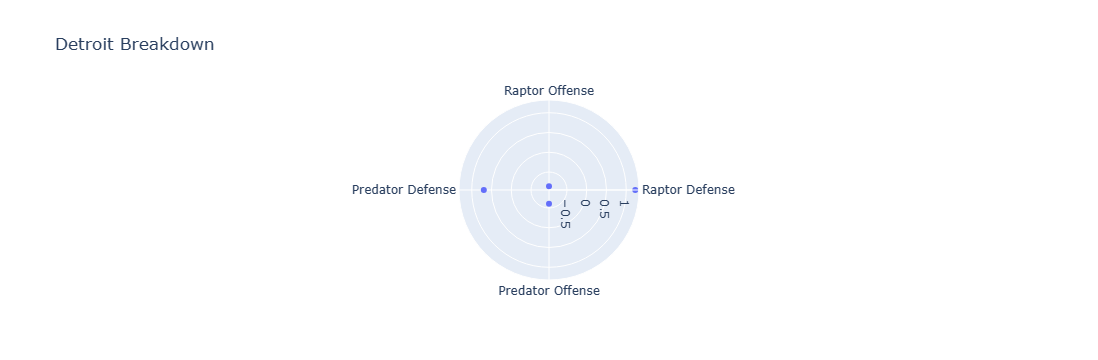

In [119]:
polar_scatter(DET_r_values, DET_theta_values, "Detroit Breakdown")

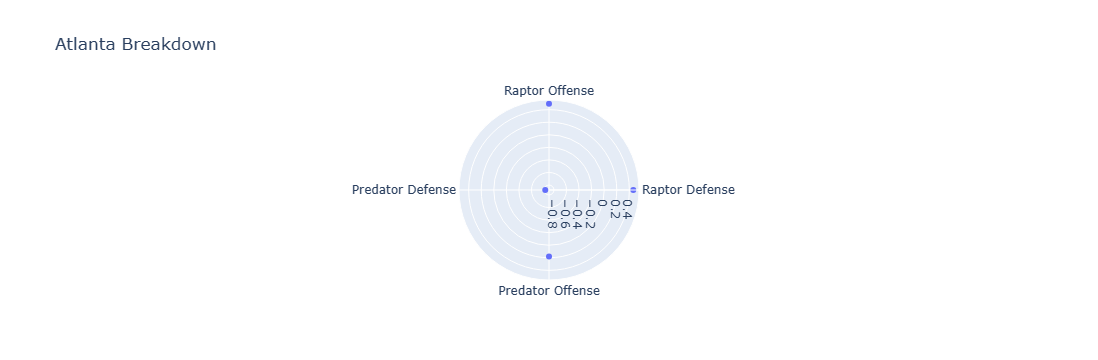

In [120]:
#ATL Values
ATL_r_values = [.494, .463, .179, -.819]


polar_scatter(ATL_r_values, DET_theta_values, "Atlanta Breakdown")

In [121]:
def polar_scatter(rvalue, title):
    fig=px.scatter_polar(raptor_predator_df, r=rvalue, theta="team", color="team", title=title, template="ggplot2")
    fig.show()

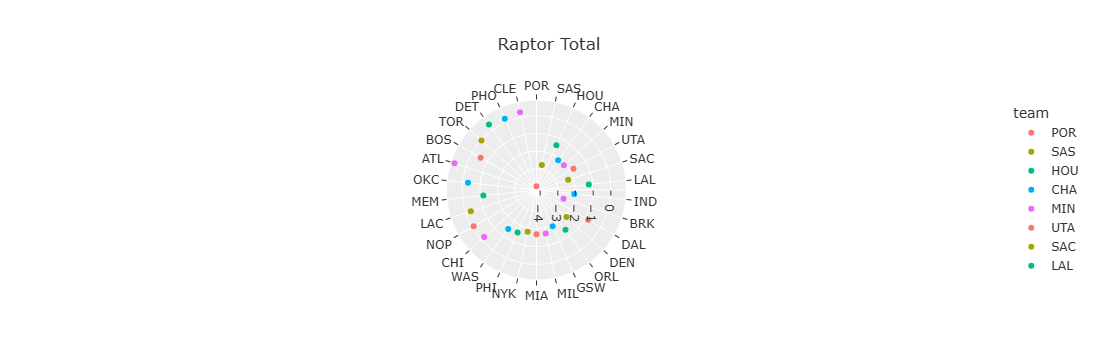

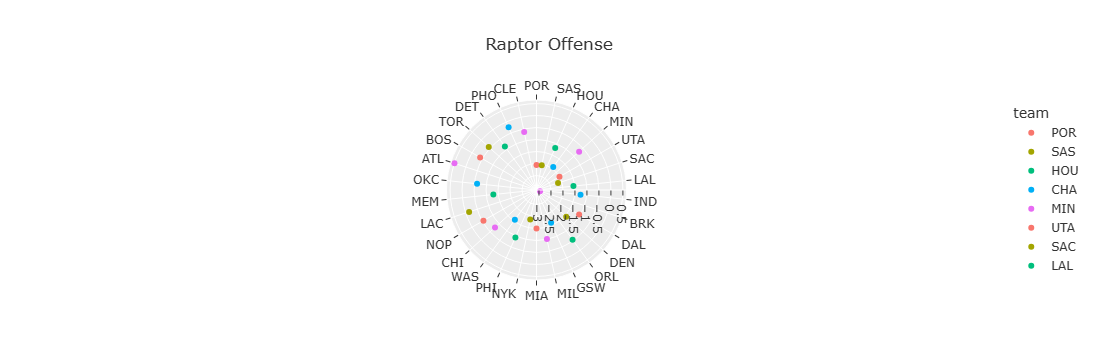

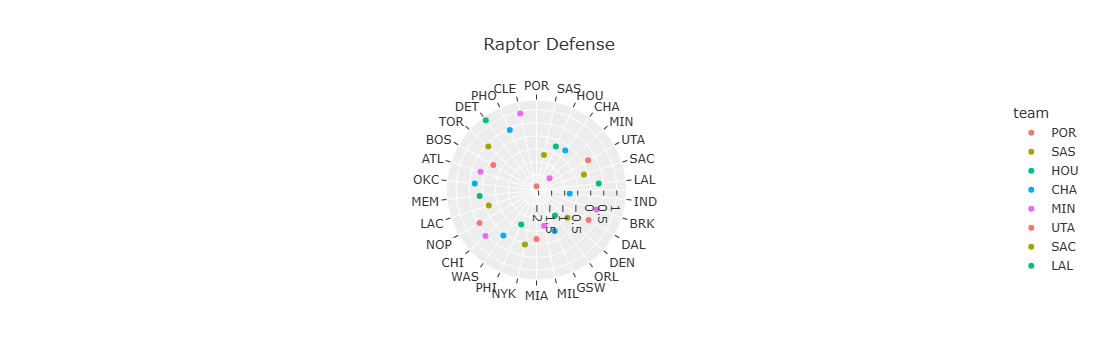

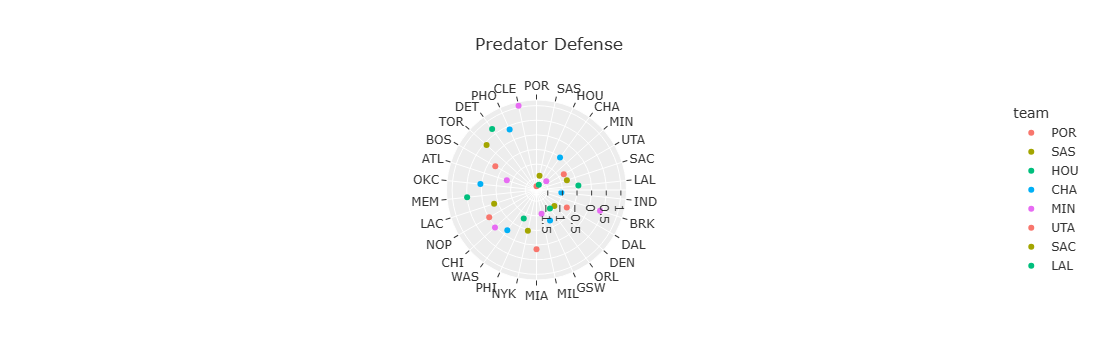

In [122]:
polar_scatter("Raptor Total", "Raptor Total")
polar_scatter("Predator Total", "Predator Total")
polar_scatter("Raptor Offense", "Raptor Offense")
polar_scatter("Predator Offense", "Predator Offense")
polar_scatter("Raptor Defense", "Raptor Defense")
polar_scatter("Predator Defense", "Predator Defense")

In [123]:
raptor_offense_team.head(20)

team
ATL    0.493756
BOS   -0.388098
BRK   -2.946680
CHA   -1.917041
CHI   -0.773662
CLE   -0.631976
DAL   -1.050607
DEN   -1.435613
DET   -0.859854
GSW   -1.605876
HOU   -1.184309
IND   -1.256869
LAC   -0.147709
LAL   -1.554009
MEM   -1.293670
MIA   -1.497727
MIL   -1.009468
MIN   -0.711503
NOP   -0.548012
NYK   -1.849728
Name: raptor_offense, dtype: float64

<Figure size 2000x600 with 0 Axes>

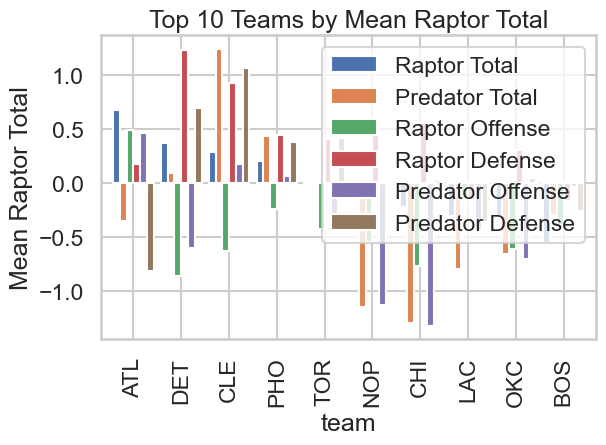

In [124]:
plt.figure(figsize=(20, 6))
top_10_rteams.plot(x="team",kind= "bar",width=.85, )
plt.title("Top 10 Teams by Mean Raptor Total")
plt.xlabel("team")
plt.ylabel("Mean Raptor Total")
plt.xticks(rotation= 90)
plt.tight_layout()

#top_raptor_teams = raptor_predator_df[["team", "Raptor Total"]].\
#sort_values(by="Raptor Total", ascending=False).head(10)

# Set up variables
#raptor = top_raptor_teams["Raptor Total"]
#team_names = top_raptor_teams["team"]

# Generate Bar plot
#bar_plot(team_names, raptor, "Team", "Mean RAPTOR Total", "Teams by Mean RAPTOR Total", (22,7))

#plt.figure(figsize=(10, 6))
#top_20_pteams.plot(kind= "bar")
#plt.title("Top 20 Teams by Mean Predator Total")
#plt.xlabel("Team")
#plt.ylabel("Mean Raptor Total")
#plt.xticks(rotation= 90)
#plt.tight_layout()

#top_predator_teams = raptor_predator_df[["team", "Predator Total"]].\
#sort_values(by="Predator Total", ascending=False).head(10)

# Set up variables
#predator = top_predator_teams["Predator Total"]
#team_names = top_predator_teams["team"]

# Generate Bar plot
#bar_plot(team_names, raptor, "Team", "Mean PREDATOR Total", "Teams by Mean PREDATOR Total", (22,7))

<Figure size 2000x600 with 0 Axes>

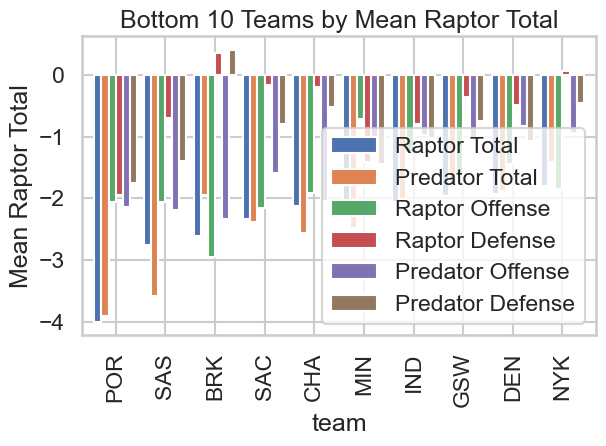

In [125]:
plt.figure(figsize=(20, 6))
bottom_10_rteams.plot(x="team",kind= "bar",width=.85, )
plt.title("Bottom 10 Teams by Mean Raptor Total")
plt.xlabel("team")
plt.ylabel("Mean Raptor Total")
plt.xticks(rotation= 90)
plt.tight_layout()

#bottom_raptor_teams = raptor_predator_df[["team", "Raptor Total"]].\
#sort_values(by="Raptor Total", ascending=False).tail(10)

# Set up variables
#team_names = bottom_raptor_teams["team"]

# Generate Bar plot
#bar_plot(team_names, raptor, "Team", "Mean RAPTOR Total", "Bottom Teams by Mean RAPTOR Total", (22,7),color=orange)

#plt.figure(figsize=(10, 6))
#bottom_20_pteams.plot(kind= "bar")
#plt.title("Bottom 20 Teams by Mean Raptor Total")
#plt.xlabel("Team")
#plt.ylabel("Mean Raptor Total")
#plt.xticks(rotation=45)
#plt.tight_layout()

#bottom_predator_teams = raptor_predator_df[["team", "Predator Total"]].\
#sort_values(by="Predator Total", ascending=False).tail(10)

# Set up variables
#predator = bottom_predator_teams["Predator Total"]
#team_names = bottom_predator_teams["team"]

# Generate Bar plot
#bar_plot(team_names, raptor, "Team", "Mean PREDATOR Total", "Bottom Teams by Mean PREDATOR Total", (22,7))

### Question #3: How accurate are the overall results of predictive-RAPTOR, which was used for the historical data charts (1977-2013), compared to those of modern RAPTOR’s integration (2013-Present)?

**Calculating historical and latest RAPTOR totals by team**

In [126]:
his_team_raptor_totals = historical_df.groupby("team")["raptor_total"].sum().reset_index()
his_team_raptor_totals.head()

team  raptor_total
0  ATL  -1867.349832
1  BOS  -1461.653071
2  BRK   -300.833420
3  BUF   -100.487762
4  CHA   -858.869307

In [127]:
lat_team_raptor_totals = latest_df.groupby("team")["raptor_total"].sum().reset_index()
lat_team_raptor_totals.head()

team  raptor_total
0  ATL      6.863266
1  BOS     -3.631239
2  BRK   -104.256530
3  CHA    -40.304983
4  CHI     -4.001443

In [128]:
merged_team_raptor_totals = lat_team_raptor_totals.merge(his_team_raptor_totals, on="team", suffixes=("_latest", "_historical"))
merged_team_raptor_totals.head()

team  raptor_total_latest  raptor_total_historical
0  ATL             6.863266             -1867.349832
1  BOS            -3.631239             -1461.653071
2  BRK          -104.256530              -300.833420
3  CHA           -40.304983              -858.869307
4  CHI            -4.001443             -1531.152283

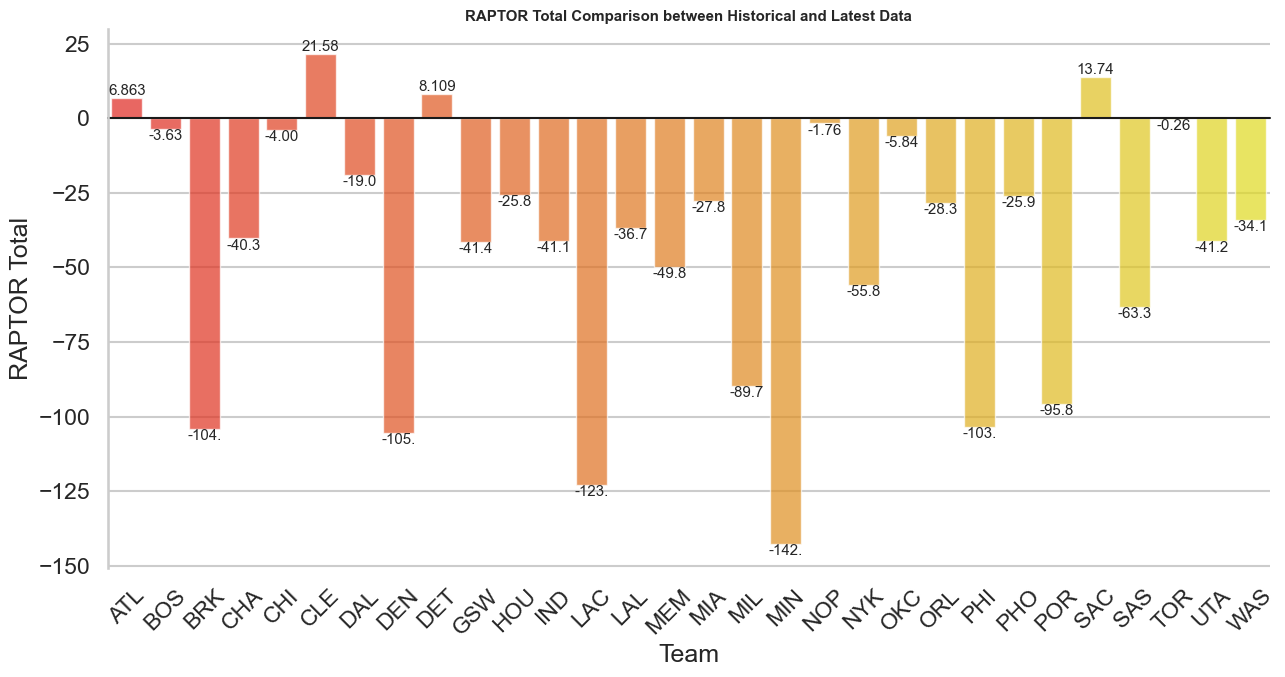

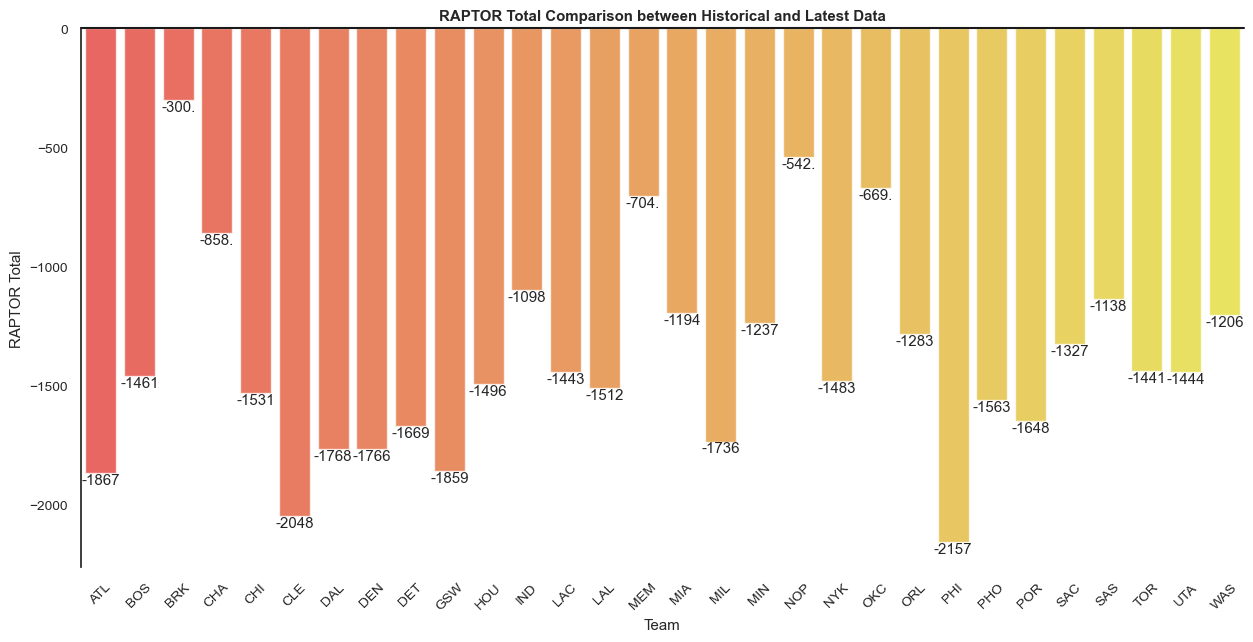

In [129]:
sns_raptor_latest = sns_bar_plot(merged_team_raptor_totals, "team", "raptor_total_latest", "RAPTOR Total Comparison between Historical and Latest Data",
             "Team", "RAPTOR Total")

sns_raptor_his = sns_bar_plot(merged_team_raptor_totals, "team", "raptor_total_historical", "RAPTOR Total Comparison between Historical and Latest Data",
             "Team", "RAPTOR Total")

In [130]:
# trying to figure out jointplot

#sns.jointplot(sns_raptor_latest, sns_raptor_his)

**Calculating Historical and Latest War total**

In [131]:
his_team_war_totals = historical_df.groupby("team")["war_total"].sum().reset_index()
his_team_war_totals.head()

team    war_total
0  ATL  1319.084509
1  BOS  1712.529584
2  BRK   255.392848
3  BUF    36.396243
4  CHA   349.159085

In [132]:
lat_team_war_totals = latest_df.groupby("team")["war_total"].sum().reset_index()
lat_team_war_totals.head()

team  war_total
0  ATL  31.989519
1  BOS  57.010582
2  BRK  31.362127
3  CHA  12.818726
4  CHI  31.283879

In [133]:
merged_war_totals = his_team_war_totals.merge(lat_team_war_totals, on="team", suffixes=("_historical", "_latest"))
merged_war_totals.head()

team  war_total_historical  war_total_latest
0  ATL           1319.084509         31.989519
1  BOS           1712.529584         57.010582
2  BRK            255.392848         31.362127
3  CHA            349.159085         12.818726
4  CHI           1447.384776         31.283879

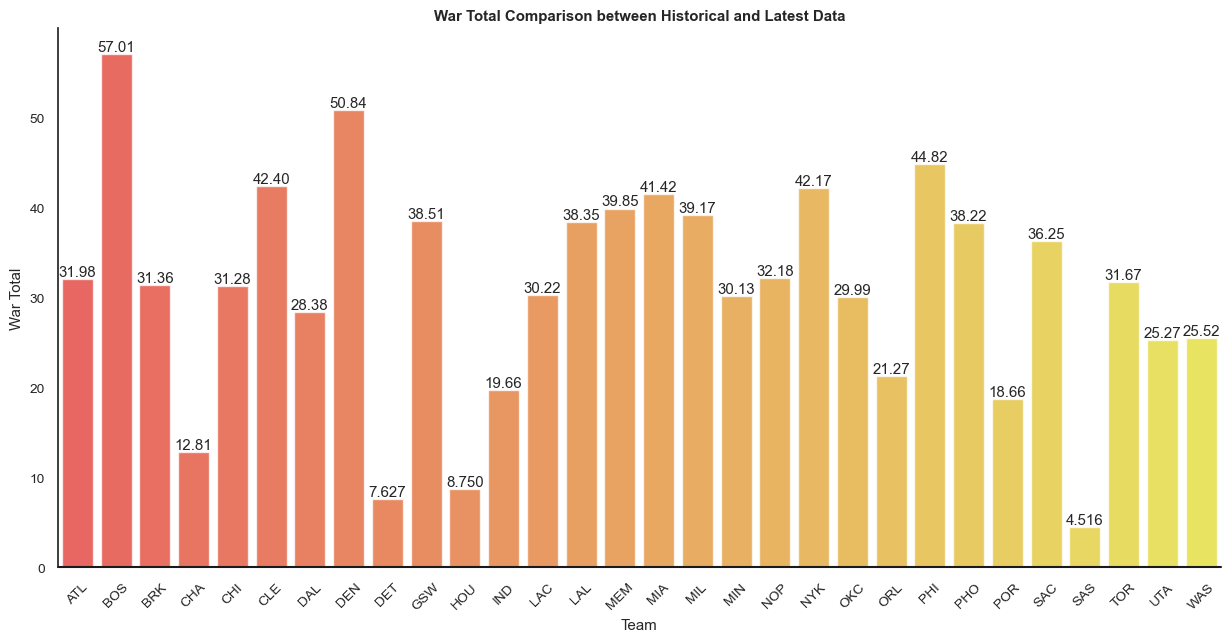

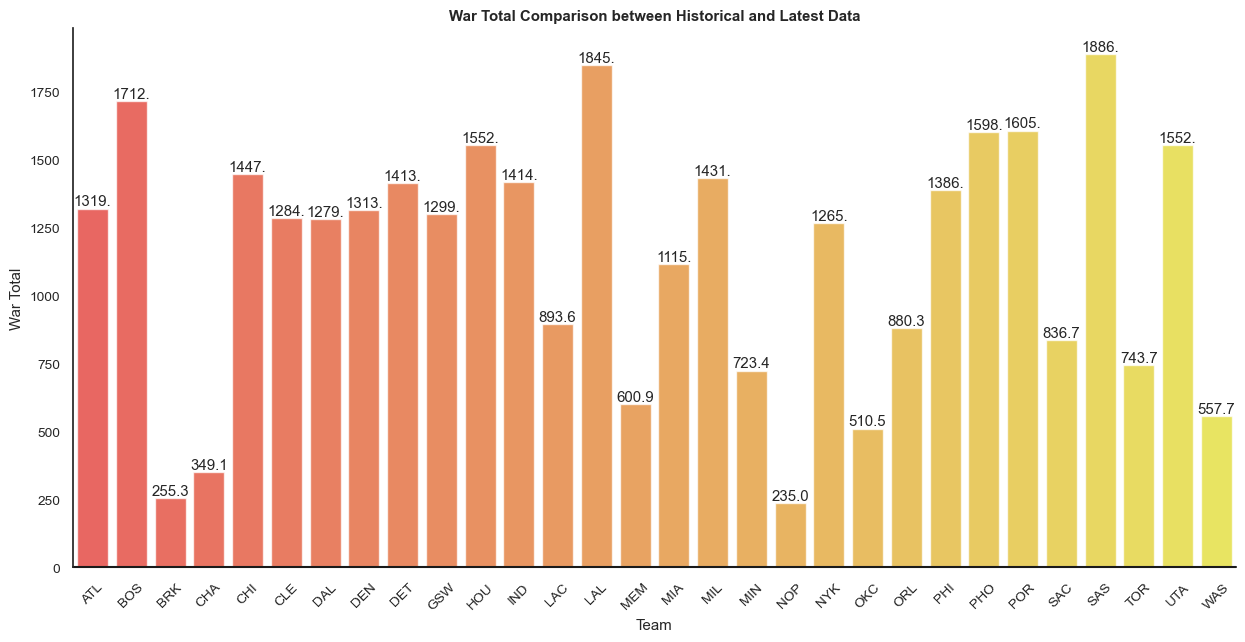

In [134]:
sns_war_latest = sns_bar_plot(merged_war_totals, "team", "war_total_latest", "War Total Comparison between Historical and Latest Data", "Team", "War Total")
sns_war_his = sns_bar_plot(merged_war_totals, "team", "war_total_historical", "War Total Comparison between Historical and Latest Data", "Team", "War Total")


**Calculating Average Historical and Latest RAPTOR total**

In [135]:
average_his_team_raptor_total = historical_df.groupby("team")["raptor_total"].mean().reset_index()
average_his_team_raptor_total.head()

team  raptor_total
0  ATL     -1.616753
1  BOS     -1.228280
2  BRK     -0.999447
3  BUF     -2.715885
4  CHA     -2.379139

In [136]:
average_lat_team_raptor_total = latest_df.groupby("team")["raptor_total"].mean().reset_index()
average_lat_team_raptor_total.head()

team  raptor_total
0  ATL      0.228776
1  BOS     -0.113476
2  BRK     -2.673244
3  CHA     -2.121315
4  CHI     -0.222302

In [137]:
merged_raptor_average_totals = pd.merge(average_lat_team_raptor_total, average_his_team_raptor_total, on="team", suffixes=("_latest", "_historical"))
merged_raptor_average_totals.head()

team  raptor_total_latest  raptor_total_historical
0  ATL             0.228776                -1.616753
1  BOS            -0.113476                -1.228280
2  BRK            -2.673244                -0.999447
3  CHA            -2.121315                -2.379139
4  CHI            -0.222302                -1.402154

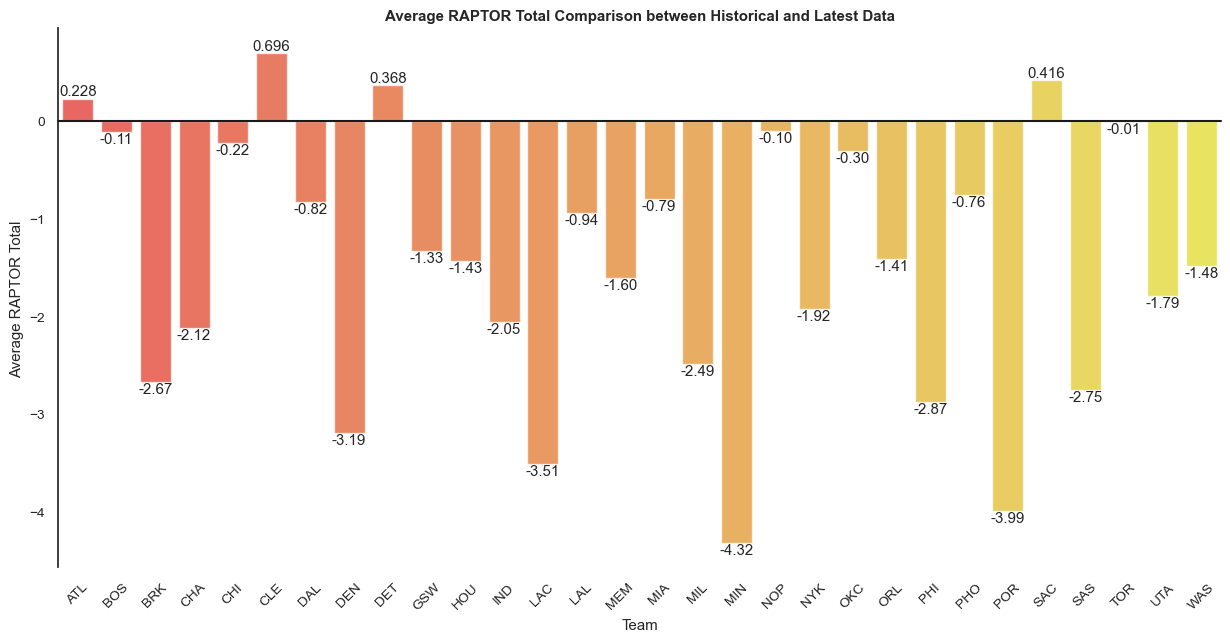

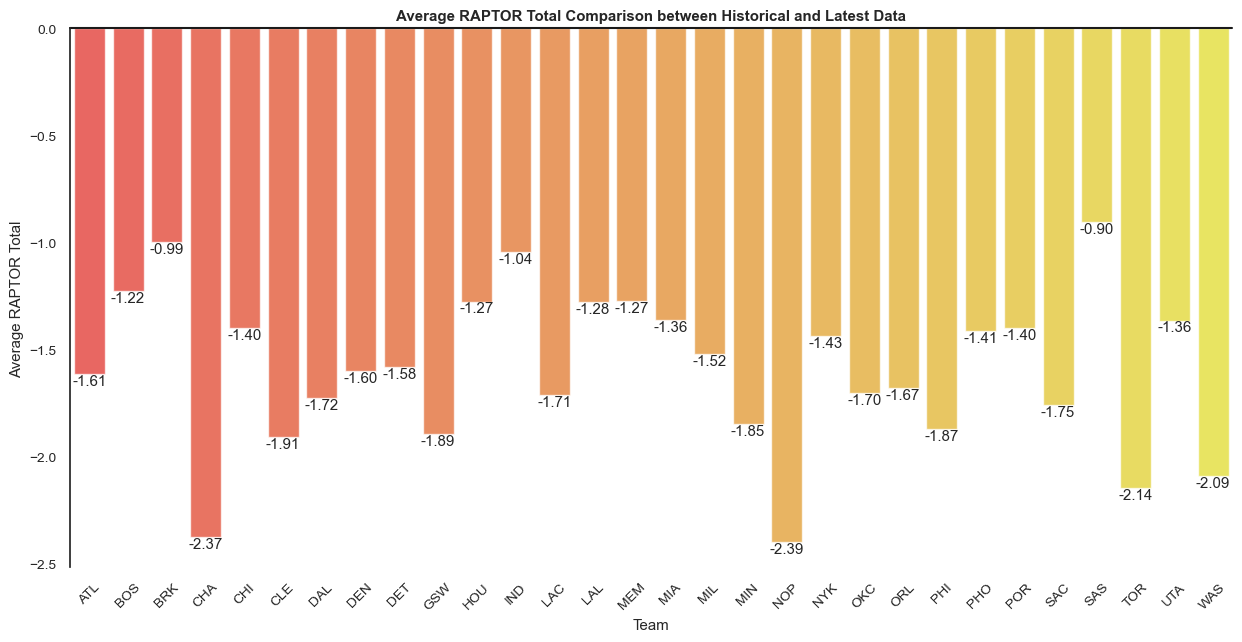

In [138]:
sns_raptor_latest = sns_bar_plot(merged_raptor_average_totals, "team", "raptor_total_latest", "Average RAPTOR Total Comparison between Historical and Latest Data", "Team", "Average RAPTOR Total")
sns_raptor_his = sns_bar_plot(merged_raptor_average_totals, "team", "raptor_total_historical", "Average RAPTOR Total Comparison between Historical and Latest Data", "Team", "Average RAPTOR Total")

**Calculating Average Historical and Latest War total** 

In [139]:
average_his_team_war_totals = historical_df.groupby("team")["war_total"].mean().reset_index()
average_his_team_war_totals.head()

team  war_total
0  ATL   1.142065
1  BOS   1.439100
2  BRK   0.848481
3  BUF   0.983682
4  CHA   0.967200

In [140]:
average_lat_team_war_totals = latest_df.groupby("team")["war_total"].mean().reset_index()
average_lat_team_war_totals.head()

team  war_total
0  ATL   1.066317
1  BOS   1.781581
2  BRK   0.804157
3  CHA   0.674670
4  CHI   1.737993

In [141]:
merged_team_war_totals = pd.merge(average_lat_team_war_totals, average_his_team_war_totals, on="team", suffixes=("_latest", "_historical"))
merged_team_war_totals.head()

team  war_total_latest  war_total_historical
0  ATL          1.066317              1.142065
1  BOS          1.781581              1.439100
2  BRK          0.804157              0.848481
3  CHA          0.674670              0.967200
4  CHI          1.737993              1.325444

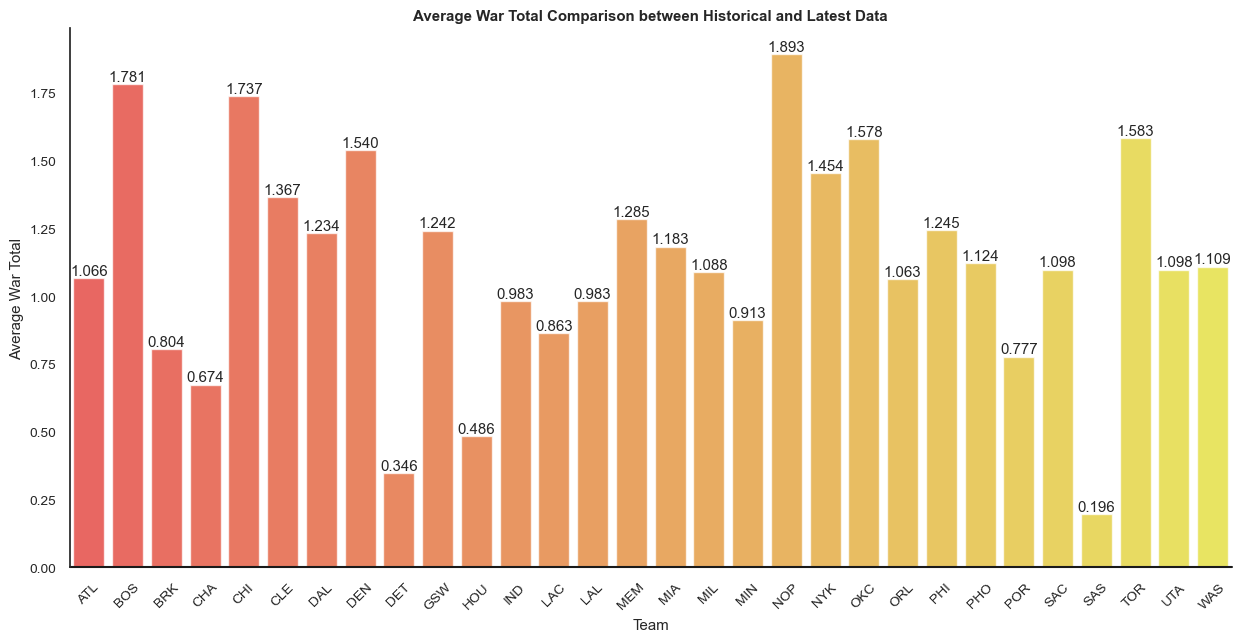

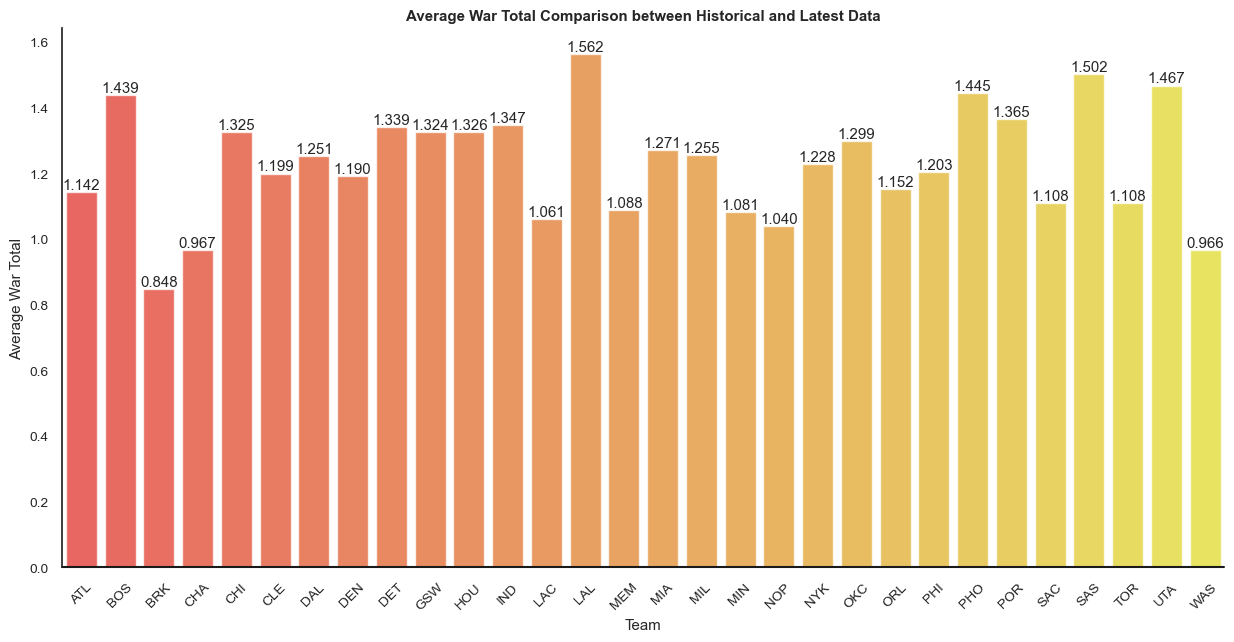

In [142]:
sns_war_latest = sns_bar_plot(merged_team_war_totals, "team", "war_total_latest", "Average War Total Comparison between Historical and Latest Data", "Team", "Average War Total")
sns_war_his = sns_bar_plot(merged_team_war_totals, "team", "war_total_historical", "Average War Total Comparison between Historical and Latest Data", "Team", "Average War Total")

### Question #4: Which players had the most minutes played and the greatest pace impact on their team compared to their total RAPTOR scores?

In [143]:
mean_df.head(2)

player_name       season         poss      mp  raptor_offense  \
0     A.C. Green  1993.166667  2714.833333  1355.7       -0.358516   
1  A.J. Bramlett  2000.000000   123.000000    61.0       -8.360250   

   raptor_defense  raptor_total  war_total  war_reg_season  war_playoffs  \
0        0.181476     -0.177040   2.005301        1.790797      0.214503   
1       -1.460235     -9.820485  -0.221281       -0.221281      0.000000   

   predator_offense  predator_defense  predator_total  pace_impact  \
0         -0.444949         -0.005895       -0.450844    -0.487704   
1         -7.899853         -1.093612       -8.993465     0.527413   

   raptor_box_offense  raptor_box_defense  raptor_box_total  \
0                 0.0                 0.0               0.0   
1                 0.0                 0.0               0.0   

   raptor_onoff_offense  raptor_onoff_defense  raptor_onoff_total  
0                   0.0                   0.0                 0.0  
1                   0.0                   0.0                 0.0

**Top 20 Minutes Played & Pace Impact per Player**

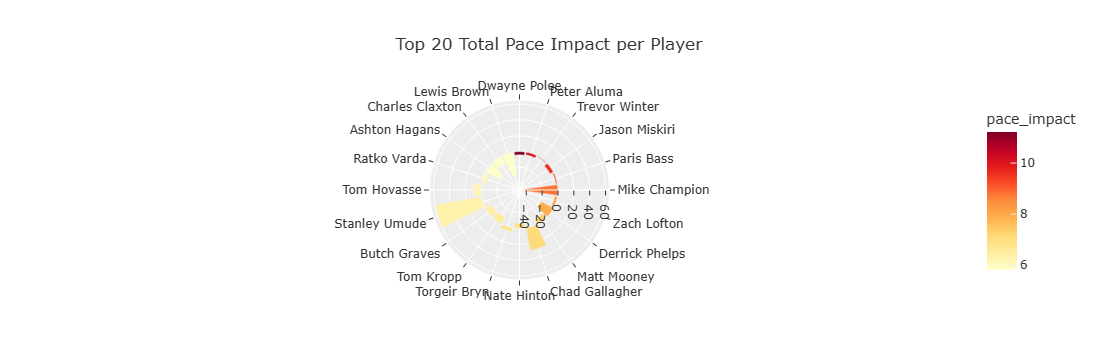

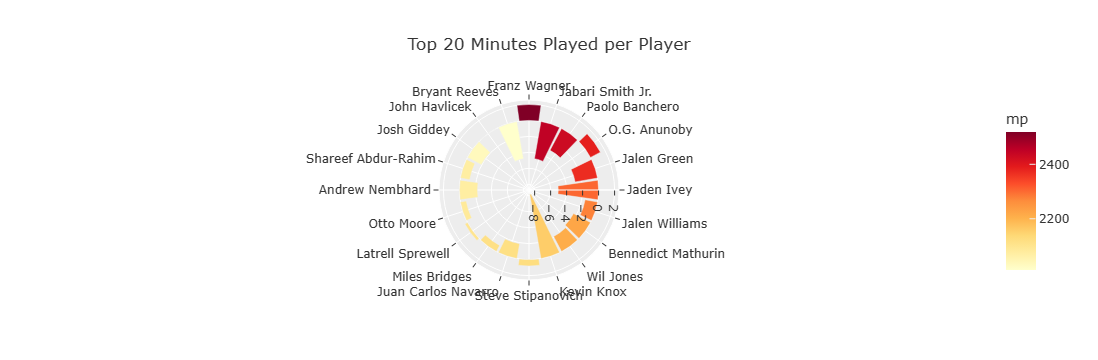

In [144]:
# Sort data

pace=mean_df.sort_values(by="pace_impact",ascending=False)
pace_20=pace.head(20)

tmp=mean_df.sort_values(by="mp",ascending=False)
mp_20=tmp.head(20)

# Generate polar bar

polar_bar(pace_20,"pace_impact","Top 20 Total Pace Impact per Player")
polar_bar(mp_20,"mp","Top 20 Minutes Played per Player")



**RAPTOR Scores in relation with Minutes played and Total Pace Impact**

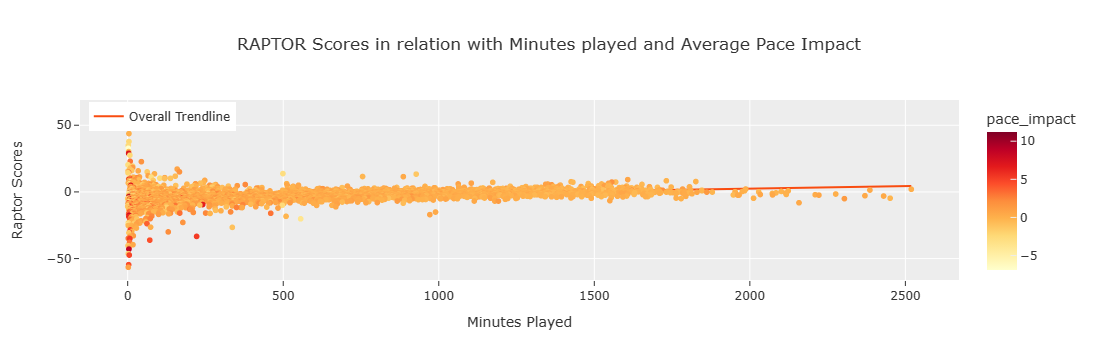

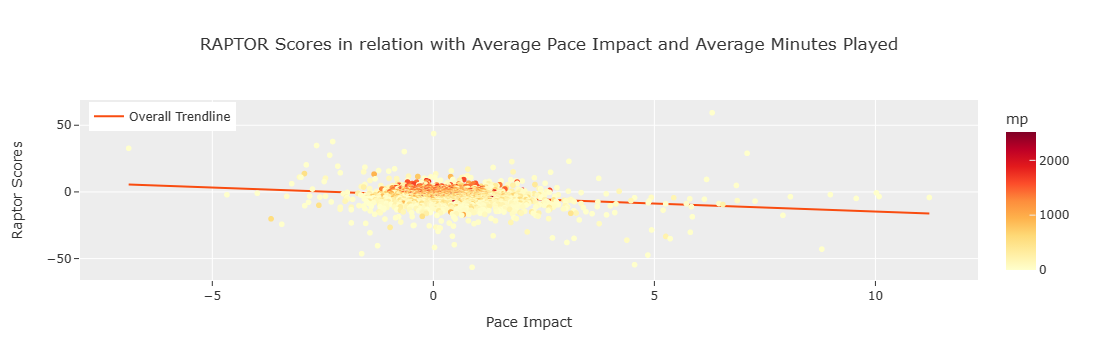

In [145]:
# Sort the data

by_raptor=mean_df.sort_values(by="raptor_total",ascending=False)
by_raptor

# declare variables

x0=by_raptor["mp"]
y0=by_raptor["raptor_total"]

x1=by_raptor["pace_impact"]
y1=by_raptor["raptor_total"]


# generate scatter plot

int_scatter(by_raptor,x0,y0,"pace_impact",
            "RAPTOR Scores in relation with Minutes played and Average Pace Impact",
           "Minutes Played","Raptor Scores")

int_scatter(by_raptor,x1,y1,"mp",
            "RAPTOR Scores in relation with Average Pace Impact and Average Minutes Played",
           "Pace Impact","Raptor Scores")

### Question #5: How do these statistics line up by player in relation to the top players/teams (MVPs) of the 2022-2023 season?

In [146]:
# fill all null values with 0 in latest_df
clean_df_2023 = latest_df.fillna(0)
clean_df_2023.head()

player_name  player_id  season season_type team  poss    mp  \
0  Precious Achiuwa  achiupr01    2023          RS  TOR  2328  1140   
1      Steven Adams  adamsst01    2023          RS  MEM  2391  1133   
2       Bam Adebayo  adebaba01    2023          PO  MIA  1681   850   
3       Bam Adebayo  adebaba01    2023          RS  MIA  5252  2598   
4      Ochai Agbaji  agbajoc01    2023          RS  UTA  2604  1209   

   raptor_box_offense  raptor_box_defense  raptor_box_total  ...  \
0           -2.442459            0.605968         -1.836491  ...   
1           -0.539149            4.174473          3.635324  ...   
2           -2.042952            1.343185         -0.699767  ...   
3           -1.861596            2.663534          0.801939  ...   
4           -1.323938           -2.198396         -3.522334  ...   

   raptor_offense  raptor_defense  raptor_total  war_total  war_reg_season  \
0       -1.771180       -0.283673     -2.054852   0.400488        0.400488   
1        0.416279        3.550985      3.967264   3.892111        3.892111   
2       -1.667750        1.933160      0.265409   1.342984        0.000000   
3       -1.154758        2.718460      1.563703   5.692164        5.692164   
4       -1.010696       -1.964927     -2.975622  -0.139469       -0.139469   

   war_playoffs  predator_offense  predator_defense  predator_total  \
0      0.000000         -1.867986         -0.182806       -2.050792   
1      0.000000          0.025097          3.570024        3.595120   
2      1.342984         -0.347436          2.167669        1.820232   
3      0.000000         -0.957159          2.658545        1.701386   
4      0.000000         -1.145865         -2.506387       -3.652252   

   pace_impact  
0    -0.956065  
1     0.237905  
2    -0.415820  
3    -0.452741  
4     0.216216  

[5 rows x 23 columns]

**Top / MVP Players**

In [147]:
# Filter players based on conditions 
player_filter = clean_df_2023[(clean_df_2023['poss'] > 2000) & (clean_df_2023['mp'] > 1350)]

# Group by player_name
grouped_players = (player_filter.groupby('player_name')
                  .agg({
                      'raptor_total': 'mean',
                      'raptor_box_total': 'mean',
                      'raptor_offense': 'mean',
                      'raptor_defense': 'mean',
                      'war_total': 'mean',
                  }))

# Compute 'player_score' 
grouped_players['player_score'] = (grouped_players['raptor_total'] +
                                   grouped_players['raptor_box_total'] +
                                   grouped_players['raptor_offense'] +
                                   grouped_players['raptor_defense'] +
                                   grouped_players['war_total'])



In [148]:
# Sort based on 'player score'
sorted_players = (grouped_players.sort_values(by='player_score', ascending=False).reset_index())

# Adjust the index to start from 1 
sorted_players.index += 1

In [149]:
# Display top 10 players based on 'player_score'
top_players = sorted_players[['player_name', 'player_score']]
top_players.head()

player_name  player_score
1    Nikola Jokic     62.052979
2     Joel Embiid     37.469713
3     Luka Doncic     37.156539
4  Damian Lillard     35.136630
5   Anthony Davis     31.542043

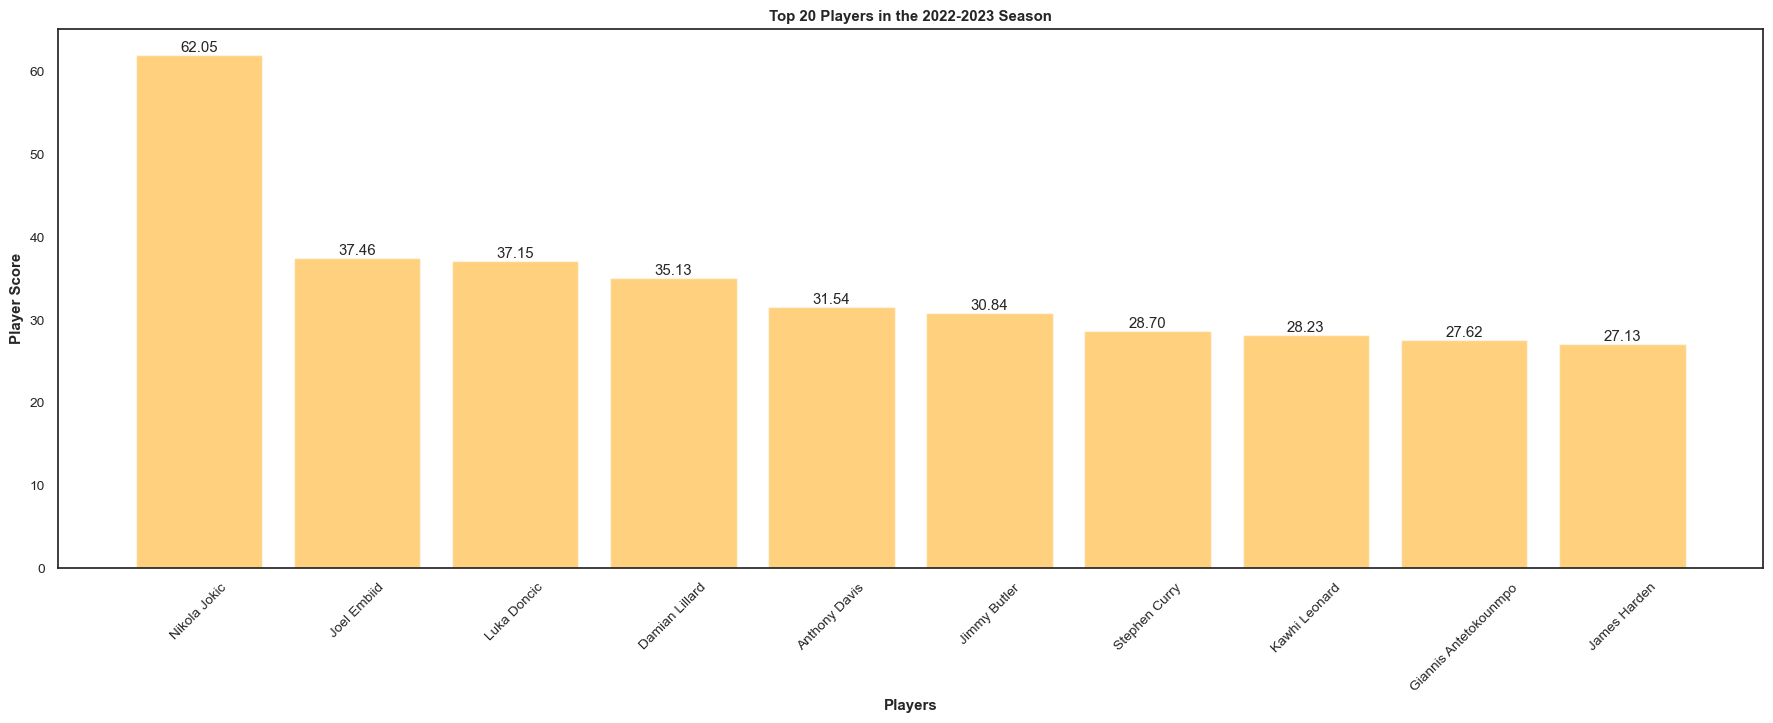

In [150]:
## Top players - Bar plot 

top_10_players = top_players.head(10)

player_score = top_10_players['player_score']
player_name = top_10_players['player_name']
color = "orange"

bar_plot(player_name, player_score, 'Players', 'Player Score', 'Players in the 2022-2023 Season', (22,7), color)

In [151]:
## Player Raptor Total 

# Sort based on "raptor total"
player_raptor_total = (player_filter.sort_values(by='raptor_total', ascending=False).reset_index(drop=True))

# Adjusting index to start from 1
player_raptor_total.index += 1

# Display top 10 
top_player_raptor_total = player_raptor_total[['player_name', 'raptor_total']]
top_player_raptor_total.head()


player_name  raptor_total
1    Nikola Jokic     14.092699
2     Joel Embiid      8.209079
3     Luka Doncic      7.823608
4  Damian Lillard      7.816497
5   Anthony Davis      7.284084

In [152]:
## Player Raptor Box Total

# Sort based on 'raptor_box_total'
player_raptor_box_total = (player_filter.sort_values(by='raptor_box_total', ascending=False).reset_index(drop=True))

# Adjusting index to start from 1
player_raptor_box_total.index += 1

# Display top 10 
top_player_raptor_box_total = player_raptor_box_total[['player_name', 'raptor_box_total']]
top_player_raptor_box_total.head()


player_name  raptor_box_total
1    Nikola Jokic         13.556629
2     Luka Doncic          8.524930
3     Joel Embiid          8.228086
4  Damian Lillard          7.982161
5    Jimmy Butler          7.557962

In [153]:
## Player Raptor offense 

# Sort base on 'raptor_offense'
player_raptor_offense = (player_filter.sort_values(by='raptor_offense', ascending=False).reset_index(drop=True))

# Adjusting index to start from 1
player_raptor_offense.index += 1

# Display top 10 
top_player_raptor_offense = player_raptor_offense[['player_name', 'raptor_offense']]
top_player_raptor_offense.head()

player_name  raptor_offense
1       Nikola Jokic        9.972458
2     Damian Lillard        9.282637
3        Luka Doncic        8.272470
4      Stephen Curry        7.492136
5  Tyrese Haliburton        6.902477

In [154]:
## Player Raptor defense 

# Sort based on 'raptor_defense'
player_raptor_defense = (player_filter.sort_values(by='raptor_defense', ascending=False).reset_index(drop=True))

# Adjusting index to start from 1
player_raptor_defense.index += 1

# Display top 10 
top_player_raptor_defense = player_raptor_defense[['player_name', 'raptor_defense']]
top_player_raptor_defense.head()

player_name  raptor_defense
1    Alex Caruso        6.133136
2    Brook Lopez        5.020746
3  Anthony Davis        4.612329
4   Nikola Jokic        4.120241
5    Rudy Gobert        4.063762

In [155]:
## Player War total 

# Sort based on 'war_total'
player_war_total = (player_filter.sort_values(by='war_total', ascending=False).reset_index(drop=True))

# Adjusting index to start from 1
player_war_total.index += 1

# Display top 10 
top_player_war_total = player_war_total[['player_name', 'war_total']]
top_player_war_total.head()

player_name  war_total
1    Nikola Jokic  20.310952
2     Luka Doncic  12.984393
3     Joel Embiid  12.823468
4  Damian Lillard  11.521474
5    Jimmy Butler  10.112917

**Top Teams**

In [156]:
# Filter teams based on conditions 
team_filter = clean_df_2023[(clean_df_2023['poss'] > 2000) & (clean_df_2023['mp'] > 1350)]

# Group by 'team'
grouped_teams = (team_filter.groupby('team')
                  .agg({
                      'raptor_total': 'sum',
                      'raptor_box_total': 'sum',
                      'raptor_offense': 'sum',
                      'raptor_defense': 'sum',
                      'war_total': 'sum',
                  }))

# Compute player score 
grouped_teams['team_score'] = (grouped_teams['raptor_total'] +
                               grouped_teams['raptor_box_total'] +
                               grouped_teams['raptor_offense'] +
                               grouped_teams['raptor_defense'] +
                               grouped_teams['war_total'])
                               

# Sort based on 'team_score'
sorted_teams = (grouped_teams.sort_values(by='team_score', ascending=False).reset_index())

# Adjust the index to start from 1 
sorted_teams.index += 1

# Display top 10 teams based on 'team_score'
top_teams = sorted_teams[['team', 'team_score']]
top_teams.head()

team  team_score
1  DEN   96.026179
2  MIL   78.389680
3  CLE   76.217487
4  MEM   73.376001
5  BOS   72.744779

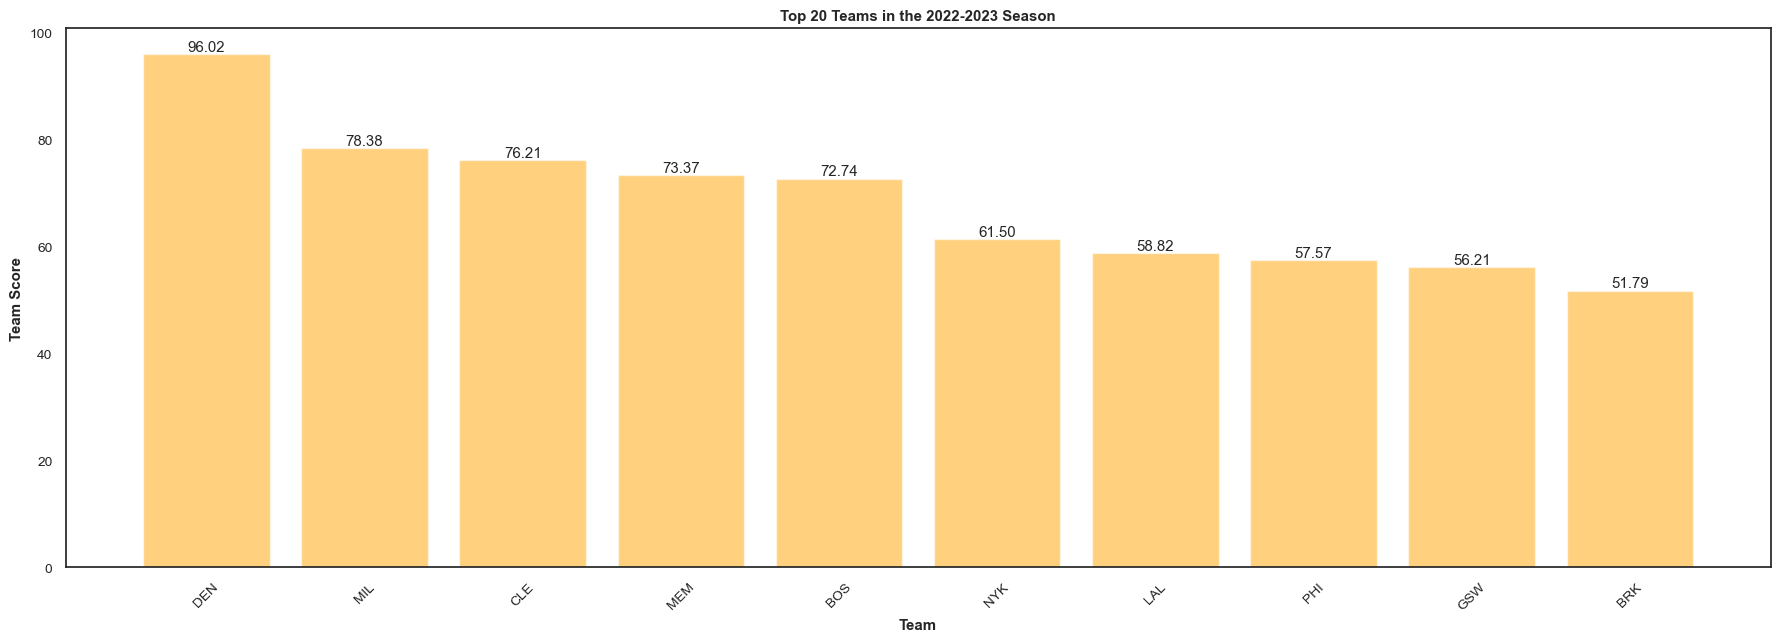

In [157]:
## Top team - Bar plot 

top_10_teams = top_teams.head(10)

team_score = top_10_teams['team_score']
teams = top_10_teams['team']
color = "orange"

bar_plot(teams, team_score, 'Team', 'Team Score', 'Teams in the 2022-2023 Season', (22,7), color)

In [158]:
## Top Teams - Raptor total

# Sort based on "raptor total"
team_raptor_total = (team_filter.sort_values(by='raptor_total', ascending=False).reset_index(drop=True))

# Adjusting index to start from 1
team_raptor_total.index += 1

# Display top 10 
top_team_raptor_total = team_raptor_total[['team', 'raptor_total']]
top_team_raptor_total.head()

team  raptor_total
1  DEN     14.092699
2  PHI      8.209079
3  DAL      7.823608
4  POR      7.816497
5  LAL      7.284084

In [159]:
## Team Raptor box total

# Sort based on 'raptor_box_total'
team_raptor_box_total = (team_filter.sort_values(by='raptor_box_total', ascending=False).reset_index(drop=True))

# Adjusting index to start from 1
team_raptor_box_total.index += 1

# Display top 10 
top_team_raptor_box_total = team_raptor_box_total[['team', 'raptor_box_total']]
top_team_raptor_box_total.head()

team  raptor_box_total
1  DEN         13.556629
2  DAL          8.524930
3  PHI          8.228086
4  POR          7.982161
5  MIA          7.557962

In [160]:
## Team Raptor offense

# Sort base on 'raptor_offense'
team_raptor_offense = (team_filter.sort_values(by='raptor_offense', ascending=False).reset_index(drop=True))

# Adjusting index to start from 1
team_raptor_offense.index += 1

# Display top 10 
top_team_raptor_offense = team_raptor_offense[['team', 'raptor_offense']]
top_team_raptor_offense.head()

team  raptor_offense
1  DEN        9.972458
2  POR        9.282637
3  DAL        8.272470
4  GSW        7.492136
5  IND        6.902477

In [161]:
## Top Teams - Raptor Defense 

# Sort based on 'raptor_defense'
team_raptor_defense = (team_filter.sort_values(by='raptor_defense', ascending=False).reset_index(drop=True))

# Adjusting index to start from 1
team_raptor_defense.index += 1

# Display top 10 
top_team_raptor_defense = team_raptor_defense[['team', 'raptor_defense']]
top_team_raptor_defense.head()

team  raptor_defense
1  CHI        6.133136
2  MIL        5.020746
3  LAL        4.612329
4  DEN        4.120241
5  MIN        4.063762

In [162]:
## Top Teams - War Total 

# Sort based on 'war_total'
team_war_total = (team_filter.sort_values(by='war_total', ascending=False).reset_index(drop=True))

# Adjusting index to start from 1
team_war_total.index += 1

# Display top 10 
top_team_war_total = player_war_total[['team', 'war_total']]
top_team_war_total.head()

team  war_total
1  DEN  20.310952
2  DAL  12.984393
3  PHI  12.823468
4  POR  11.521474
5  MIA  10.112917

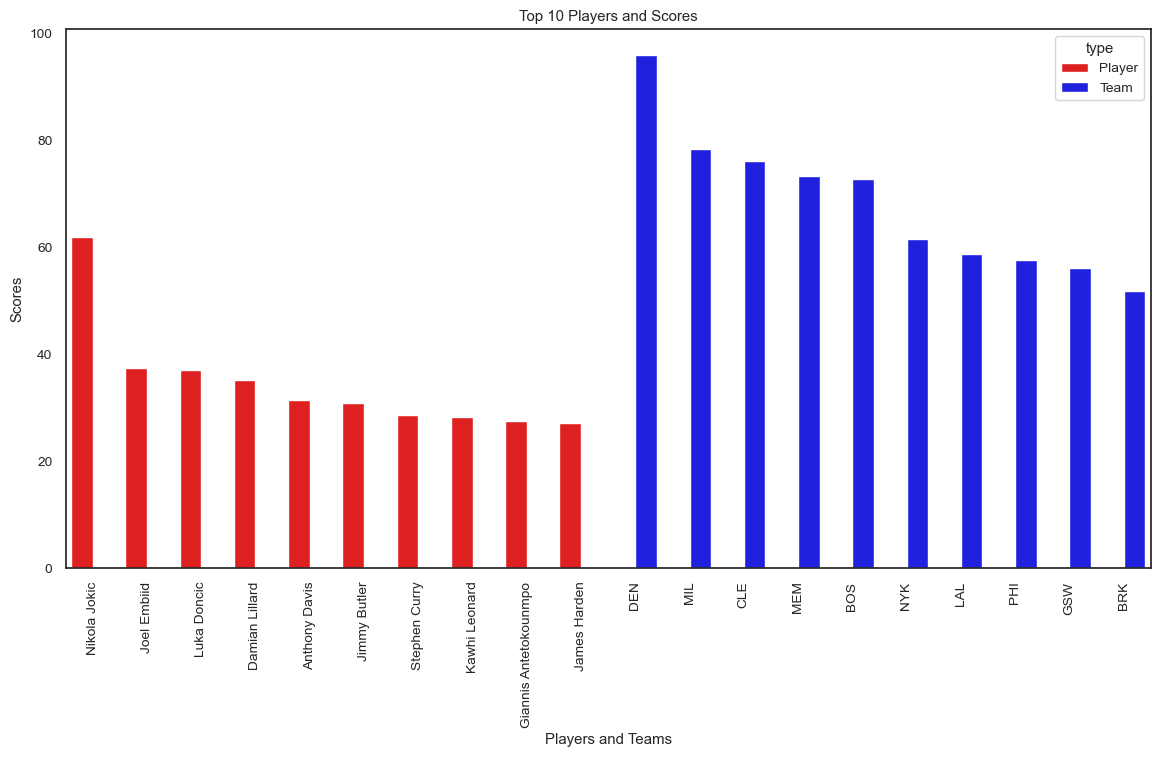

In [163]:
## Player vs Teams

# Data preparation 
top_10_players_adjust = top_10_players.rename(columns={'player_name': 'Players and Teams', 'player_score': 'score'}).assign(type='Player')
top_10_teams_adjust = top_10_teams.rename(columns={'team': 'Players and Teams', 'team_score': 'score'}).assign(type='Team')

# Concatenate dataframe 
combined_df = pd.concat([top_10_players_adjust, top_10_teams_adjust])

# Barplot
plt.figure(figsize=(14,7))
sns.barplot(x='Players and Teams', y='score', hue='type', data=combined_df, palette={'Player': 'red', 'Team': 'Blue'})
plt.xticks(rotation=90)
plt.ylabel('Scores')
plt.title('Top 10 Players and Scores')
plt.show()

In [164]:
## Correlation

#corr_df=clean_df_2023[['poss',
       #'mp', 'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total', 
       #'war_playoffs', 'predator_offense', 'predator_defense', 'predator_total',
       #'raptor_box_total']].corr()


#plt.figure(figsize=(10,10))
#sns.set_context("notebook",font_scale=0.8)

#sns.heatmap(corr_df, annot=True, cmap="YlOrRd")
#plt.show()

## **Analysis/Results**

### Correaltion Matrix

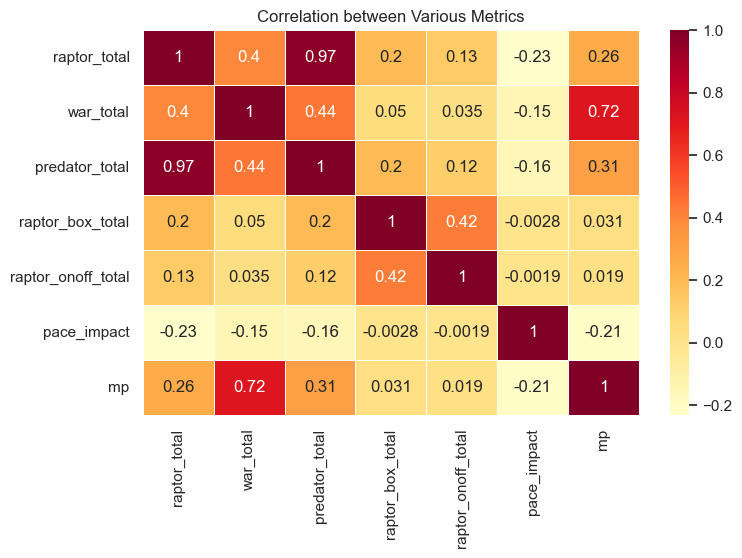

In [165]:
# ref - youtube - Derek Banas
# Filter the clean dataframe for desired features

df_mx=clean_df[[ 'raptor_total', 
                'war_total',
                'predator_total',
                'raptor_box_total',
                'raptor_onoff_total',
                "pace_impact","mp"]].corr()

# plot a heatmap 

plt.figure(figsize=(8,5))
sns.set_context("notebook",font_scale=1)

sns.heatmap(df_mx, annot=True, cmap="YlOrRd",linewidth=0.5)
plt.title("Correlation between Various Metrics") # can be improved
plt.show()

### Team vs Season vs Raptor Scores

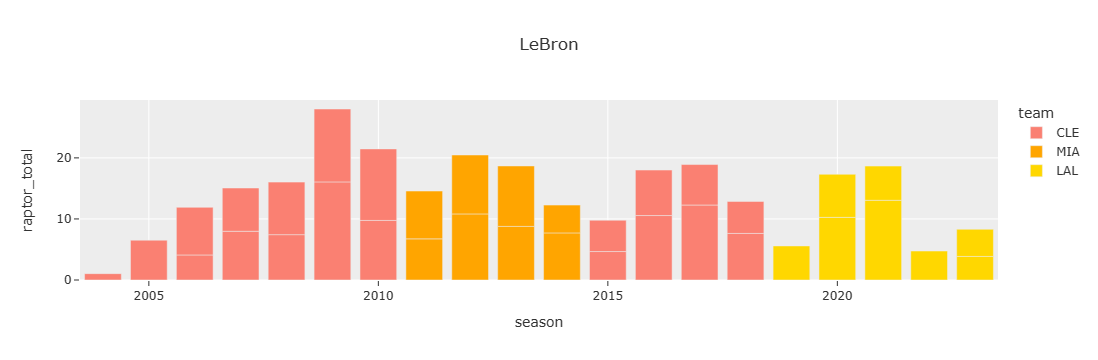

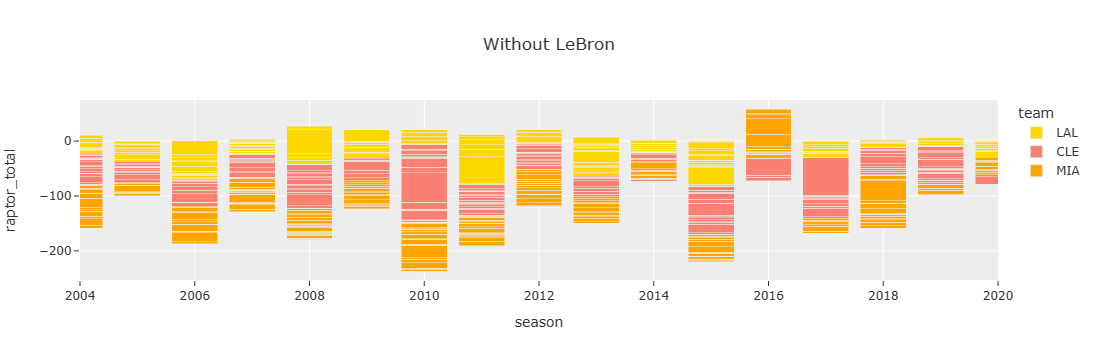

In [166]:
# color_discrete_map from [here](https://stackoverflow.com/questions/60681437/plotly-express-bar-chart-colour-change)

# Slice dataframe
LJ=clean_df[clean_df["player_name"]=="LeBron James"]

df2=clean_df[clean_df['player_name'] != "LeBron James"]
df2=df2[(df2['team'] == "CLE")|(df2['team'] == 'MIA')|(df2['team'] == 'LAL')]

# Generate bar plot

fig1=px.bar(LJ, x="season",
            y="raptor_total",
            color="team",
            title="LeBron",
            template="ggplot2",
            color_discrete_map={'CLE': 'salmon','MIA': 'orange','LAL':'gold'})
fig2=px.bar(df2, x="season",
            y="raptor_total",
            color="team",
            title="Without LeBron",
            template="ggplot2",
            range_x=[2004,2020],
            barmode='stack',
            color_discrete_map={'CLE': 'salmon','MIA': 'orange','LAL':'gold'}
            
           
           )

fig1.show()
fig2.show()

### BOXPLOTS

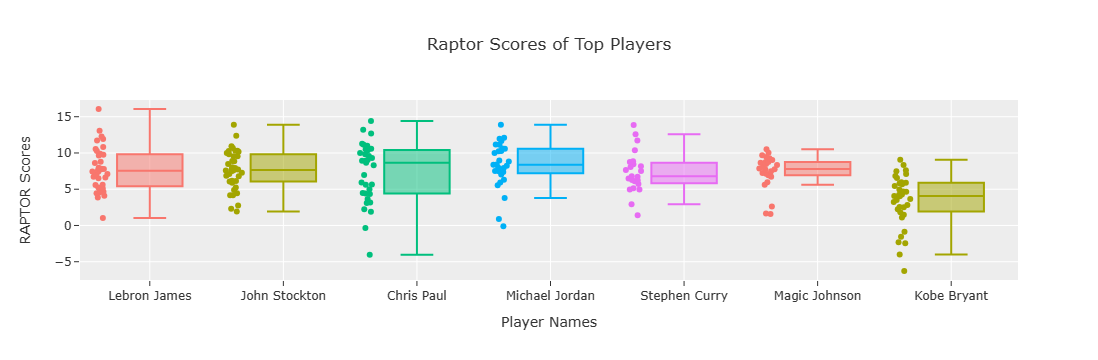

In [167]:
# ref - youtube 'Data Science Tutorials'

# filtered players

box1=box_var("LeBron James")
box2=box_var("John Stockton")
box3=box_var("Chris Paul")
box4=box_var("Michael Jordan")
box5=box_var("Stephen Curry")
box6=box_var("Magic Johnson")
box7=box_var("Kobe Bryant")

# variables for boxplot

trace1=trace_var(box1,"Lebron James")
trace2=trace_var(box2,"John Stockton")
trace3=trace_var(box3,"Chris Paul")
trace4=trace_var(box4,"Michael Jordan")
trace5=trace_var(box5,"Stephen Curry")
trace6=trace_var(box6,"Magic Johnson")
trace7=trace_var(box7,"Kobe Bryant")


# put them together

data=[trace1,trace2,trace3,trace4,trace5,trace6,trace7]
layout = go.Layout(title="Raptor Scores of Top Players",
                   template="ggplot2",
                   showlegend=False)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(yaxis_title='RAPTOR Scores',
                 xaxis_title="Player Names")
fig.show()


**Line Plot Comapring LeBron and Kobe**

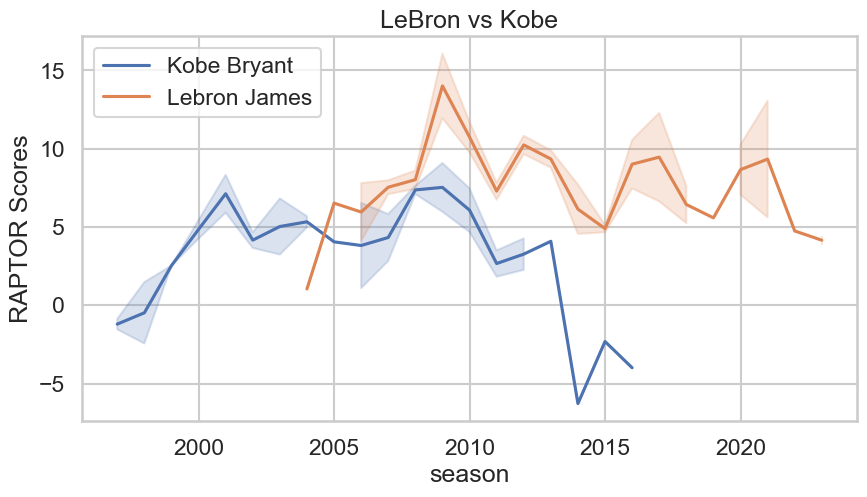

In [168]:
# Slice and filter data

lebron=clean_df[(clean_df["player_name"] == "LeBron James")]
kobe=clean_df[(clean_df["player_name"] == "Kobe Bryant")]

# Generate line plot

sns.set_theme(style="whitegrid",context="talk",font_scale=1)
plt.subplots(figsize=(10, 5))
sns.lineplot(data=kobe,x="season", y="raptor_total", label="Kobe Bryant",legend=True)
sns.lineplot(data=lebron,x="season", y="raptor_total", label="Lebron James", legend=True)
plt.title("LeBron vs Kobe")
plt.ylabel("RAPTOR Scores")
plt.legend(loc="upper left")
plt.show()